In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

playlists_df_edit = pd.read_csv('./spotify_recom.csv')
playlists_df_edit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2261 entries, 0 to 2260
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             2261 non-null   object 
 1   playlist_id    2261 non-null   object 
 2   playlist_name  2261 non-null   object 
 3   artist_name    2261 non-null   object 
 4   artistid       2261 non-null   object 
 5   name           2261 non-null   object 
 6   username       70 non-null     object 
 7   added_at       2261 non-null   object 
 8   explicit       2261 non-null   bool   
 9   duration       2261 non-null   int64  
 10  popularity     2261 non-null   int64  
 11  danceability   2223 non-null   float64
 12  loudness       2223 non-null   float64
 13  tempo          2223 non-null   float64
 14  acousticness   2223 non-null   float64
 15  energy         2223 non-null   float64
 16  valence        2223 non-null   float64
 17  liveness       2223 non-null   float64
 18  speechin

In [ ]:
playlists_df_edit = pd.read_csv('./spotify_recom.csv')
playlists_df_edit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2261 entries, 0 to 2260
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             2261 non-null   object 
 1   playlist_id    2261 non-null   object 
 2   playlist_name  2261 non-null   object 
 3   artist_name    2261 non-null   object 
 4   artistid       2261 non-null   object 
 5   name           2261 non-null   object 
 6   username       70 non-null     object 
 7   added_at       2261 non-null   object 
 8   explicit       2261 non-null   bool   
 9   duration       2261 non-null   int64  
 10  popularity     2261 non-null   int64  
 11  danceability   2223 non-null   float64
 12  loudness       2223 non-null   float64
 13  tempo          2223 non-null   float64
 14  acousticness   2223 non-null   float64
 15  energy         2223 non-null   float64
 16  valence        2223 non-null   float64
 17  liveness       2223 non-null   float64
 18  speechin

# Data Cleaning

In [ ]:
playlists_df_edit = playlists_df_edit.drop(playlists_df_edit[playlists_df_edit['loudness'].isna()].index)

# Popularity
playlists_df_edit['popularity'] = playlists_df_edit['popularity'].astype(np.float64) / 100
# Duration
playlists_df_edit['duration'] = playlists_df_edit['duration'].astype(np.float64)
playlists_df_edit['explicit'] = playlists_df_edit['explicit'].astype(np.float64)

# Date added
playlists_df_edit['added_at'] = pd.to_datetime(playlists_df_edit['added_at'])

float_cols = playlists_df_edit.dtypes[playlists_df_edit.dtypes == 'float64'].index.values

playlists_df_edit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2223 entries, 0 to 2260
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             2223 non-null   object        
 1   playlist_id    2223 non-null   object        
 2   playlist_name  2223 non-null   object        
 3   artist_name    2223 non-null   object        
 4   artistid       2223 non-null   object        
 5   name           2223 non-null   object        
 6   username       70 non-null     object        
 7   added_at       2223 non-null   datetime64[ns]
 8   explicit       2223 non-null   float64       
 9   duration       2223 non-null   float64       
 10  popularity     2223 non-null   float64       
 11  danceability   2223 non-null   float64       
 12  loudness       2223 non-null   float64       
 13  tempo          2223 non-null   float64       
 14  acousticness   2223 non-null   float64       
 15  energy         2223 n

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

#function to build entire feature set
def create_feature_set(df, float_cols):
    """ 
    Process spotify df to create a final set of features that will be used to generate recommendations
    """
    
    #tfidf genre lists
    #tfidf = TfidfVectorizer()
    #tfidf_matrix =  tfidf.fit_transform(df['consolidates_genre_lists'].apply(lambda x: " ".join(x)))
    #genre_df = pd.DataFrame(tfidf_matrix.toarray())
    #genre_df.columns = ['genre' + "|" + i for i in tfidf.get_feature_names()]
    #genre_df.reset_index(drop = True, inplace=True)

    #scale float columns
    floats = df[float_cols]
    scaler = StandardScaler()
    floats_scaled = pd.DataFrame(scaler.fit_transform(floats), columns = floats.columns)

    #concanenate all features
    final = pd.concat([floats_scaled], axis = 1)
     
    #add song id
    final['id']=df['id'].values
    
    return final

create_feature_set(playlists_df_edit, float_cols)

,explicit,duration,popularity,danceability,loudness,tempo,acousticness,energy,valence,liveness,speechiness,id
0,-0.325531,1.728620,1.107114,-1.218744,-0.713312,-0.901112,-1.036355,1.505145,-0.488551,1.840336,3.353944,0hCB0YR03f6AmQaHbwWDe8
1,-0.325531,1.728620,1.107114,-1.218744,-0.713312,-0.901112,-1.036355,1.505145,-0.488551,1.840336,3.353944,0hCB0YR03f6AmQaHbwWDe8
2,-0.325531,0.264857,1.107114,-1.047783,0.677788,-0.145364,-1.173965,1.080262,0.108445,-0.608022,-0.255229,2aoo2jlRnM3A0NyLQqMN2f
3,-0.325531,-0.216917,0.784164,-1.652722,0.818376,1.662254,-1.163520,0.918193,-0.026090,-1.064417,-0.515435,0NWPxcsf5vdjdiFUI8NgkP
4,-0.325531,-0.835596,0.830299,-0.423119,0.928616,-0.285277,-1.155326,1.518285,-0.219483,-0.717923,-0.118278,0wJoRiX5K5BxlqZTolB2LD
...,...,...,...,...,...,...,...,...,...,...,...,...
2218,-0.325531,0.006988,-0.922862,-0.903124,0.036580,0.278392,-0.743427,0.278678,-0.871133,-0.372955,-0.322650,30A3vEsySPkeXzXeMITvwE
2219,-0.325531,1.804927,-0.599911,-1.106962,-0.322154,2.116480,0.580150,-0.452821,0.247183,-0.350059,-0.523862,36OpkSbeJVaADUgJynvdht
2220,-0.325531,2.249812,-0.738318,-0.817644,-0.263273,0.250976,1.480542,-0.601749,0.793729,-0.449275,-0.580750,61AJlCxahP7OhPjYojRvN6
2221,-0.325531,2.563232,-0.046281,0.688126,-1.639847,-0.579470,0.697201,-1.267545,-0.593656,-0.296635,-0.528076,05CF4ATpqROLTQVYABNZ3W


In [ ]:
pip install gensim

## Clean Genres

In [ ]:
genres = playlists_df_edit['genres']
genres[0:10].to_numpy()

array(["['album rock', 'classic rock', 'hard rock', 'rock']",
       "['album rock', 'classic rock', 'hard rock', 'rock']",
       "['acid rock', 'blues rock', 'classic rock', 'psychedelic rock', 'rock']",
       "['acid rock', 'blues rock', 'classic rock', 'psychedelic rock', 'rock']",
       "['acid rock', 'blues rock', 'classic rock', 'psychedelic rock', 'rock']",
       "['acid rock', 'blues rock', 'classic rock', 'psychedelic rock', 'rock']",
       "['acid rock', 'blues rock', 'classic rock', 'psychedelic rock', 'rock']",
       "['acid rock', 'blues rock', 'classic rock', 'psychedelic rock', 'rock']",
       "['acid rock', 'blues rock', 'classic rock', 'psychedelic rock', 'rock']",
       "['british invasion', 'classic rock', 'rock']"], dtype=object)

In [ ]:
# Create list from genre column!! (God knows how much i tried)
genres = playlists_df_edit['genres'].apply(lambda x: x.strip('[]').replace('\'', '').replace(', ', ',').replace(' ', '').split(','))
genres = genres.apply(lambda x: [i for i in x if len(i) != 0])
genres

0                [albumrock, classicrock, hardrock, rock]
1                [albumrock, classicrock, hardrock, rock]
2       [acidrock, bluesrock, classicrock, psychedelic...
3       [acidrock, bluesrock, classicrock, psychedelic...
4       [acidrock, bluesrock, classicrock, psychedelic...
                              ...                        
2256    [afrobeat, afropop, desertblues, malianblues, ...
2257              [afropop, malianblues, mandepop, world]
2258              [afropop, malianblues, mandepop, world]
2259              [afropop, malianblues, mandepop, world]
2260    [afropop, desertblues, malianblues, mandepop, ...
Name: genres, Length: 2223, dtype: object

In [ ]:
#Remove infrequent genres
counts = genres.apply(lambda x: pd.Series(x).value_counts()).sum()
Most_Frequent = counts[counts > 100].index.to_numpy()
to_remove = counts[counts < 10].index.to_numpy()
genres = genres.apply(lambda x: [item for item in x if item not in to_remove])

Most_Frequent, to_remove[:10]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


(array(['alternativerock', 'blues', 'bluesrock', 'classicrock',
        'dancehall', 'deepnewamericana', 'folk', 'folkrock', 'indiefolk',
        'latin', 'mellowgold', 'modernreggae', 'newamericana',
        'permanentwave', 'rock', 'stompandholler'], dtype=object),
 array(['"womensmusic"', 'acousticpunk', 'africanelectronic', 'afrobeat',
        'afrofuturismobrasileiro', 'afrohouse', 'afropsych',
        'alabamaindie', 'alabamarap', 'alternativehiphop'], dtype=object))

In [ ]:
print(counts)

"womensmusic"     2.0
acidrock         16.0
acousticblues    55.0
acousticpop      24.0
acousticpunk      2.0
                 ... 
westcoastrap      1.0
westernswing      3.0
world             3.0
yodeling          2.0
zolo              2.0
Length: 502, dtype: float64


In [ ]:
# Remove rows with no clear and frequent genre in playlist
playlists_df_edit['genres'] = genres

#Reset index after removing the junk
playlists_df_edit = playlists_df_edit[playlists_df_edit['genres'].str.len() != 0]
playlists_df_edit = playlists_df_edit.reset_index()
playlists_df_edit

,index,id,playlist_id,playlist_name,artist_name,artistid,name,username,added_at,explicit,duration,popularity,danceability,loudness,tempo,acousticness,energy,valence,liveness,speechiness,genres
0,0,0hCB0YR03f6AmQaHbwWDe8,spotify:playlist:37i9dQZF1DWXRqgorJj26U,Rock Classics,Led Zeppelin,https://open.spotify.com/artist/36QJpDe2go2Kga...,Whole Lotta Love - 1990 Remaster,NaN,2020-08-17,0.0,333893.0,0.76,0.412,-11.600,89.740,0.04840,0.902,0.422,0.4050,0.4050,"[albumrock, classicrock, hardrock, rock]"
1,1,0hCB0YR03f6AmQaHbwWDe8,spotify:playlist:37i9dQZF1DWYE5MI4mMuii,Rock & Roll Party,Led Zeppelin,https://open.spotify.com/artist/36QJpDe2go2Kga...,Whole Lotta Love - 1990 Remaster,NaN,2020-08-21,0.0,333893.0,0.76,0.412,-11.600,89.740,0.04840,0.902,0.422,0.4050,0.4050,"[albumrock, classicrock, hardrock, rock]"
2,2,2aoo2jlRnM3A0NyLQqMN2f,spotify:playlist:37i9dQZF1DWXRqgorJj26U,Rock Classics,Jimi Hendrix,https://open.spotify.com/artist/776Uo845nYHJpN...,All Along the Watchtower,NaN,2020-08-17,0.0,240800.0,0.76,0.438,-6.237,113.253,0.00255,0.805,0.564,0.0842,0.0624,"[acidrock, bluesrock, classicrock, psychedelic..."
3,3,0NWPxcsf5vdjdiFUI8NgkP,spotify:playlist:37i9dQZF1DWXRqgorJj26U,Rock Classics,Jimi Hendrix,https://open.spotify.com/artist/776Uo845nYHJpN...,Hey Joe,NaN,2020-08-17,0.0,210160.0,0.69,0.346,-5.695,169.492,0.00603,0.768,0.532,0.0244,0.0377,"[acidrock, bluesrock, classicrock, psychedelic..."
4,4,0wJoRiX5K5BxlqZTolB2LD,spotify:playlist:37i9dQZF1DWXRqgorJj26U,Rock Classics,Jimi Hendrix,https://open.spotify.com/artist/776Uo845nYHJpN...,Purple Haze,NaN,2020-08-17,0.0,170813.0,0.70,0.533,-5.270,108.900,0.00876,0.905,0.486,0.0698,0.0754,"[acidrock, bluesrock, classicrock, psychedelic..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2010,2256,30A3vEsySPkeXzXeMITvwE,spotify:playlist:6RzzvekKhU0W3q66dZosP8,low down groovin,Tinariwen,https://open.spotify.com/artist/2sf2owtFSCvz2M...,Tiwàyyen,El-Bahramino,2020-11-10,0.0,224400.0,0.32,0.460,-8.709,126.437,0.14600,0.622,0.331,0.1150,0.0560,[afropop]
2011,2257,36OpkSbeJVaADUgJynvdht,spotify:playlist:6RzzvekKhU0W3q66dZosP8,low down groovin,Boubacar Traoré,https://open.spotify.com/artist/63Bilw49Uv4s2w...,Hona,El-Bahramino,2020-11-10,0.0,338746.0,0.39,0.429,-10.092,183.624,0.58700,0.455,0.597,0.1180,0.0369,[afropop]
2012,2258,61AJlCxahP7OhPjYojRvN6,spotify:playlist:6RzzvekKhU0W3q66dZosP8,low down groovin,Boubacar Traoré,https://open.spotify.com/artist/63Bilw49Uv4s2w...,M'Badehou,El-Bahramino,2020-11-10,0.0,367040.0,0.36,0.473,-9.865,125.584,0.88700,0.421,0.727,0.1050,0.0315,[afropop]
2013,2259,05CF4ATpqROLTQVYABNZ3W,spotify:playlist:6RzzvekKhU0W3q66dZosP8,low down groovin,Rokia Traoré,https://open.spotify.com/artist/6sz0k1q2aEtG5d...,Laidu,El-Bahramino,2020-11-10,0.0,386973.0,0.51,0.702,-15.172,99.747,0.62600,0.269,0.397,0.1250,0.0365,[afropop]


## Preprocess genres now!!!

In [ ]:
from gensim.models import Word2Vec
genres = playlists_df_edit['genres']

word2vec_model = Word2Vec(genres, min_count=1, size = 20)
X = word2vec_model[word2vec_model.wv.vocab]
print (len(list(word2vec_model.wv.vocab)))

163


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """


In [ ]:
X.shape, word2vec_model.wv.vocab.keys()

((163, 20),
 dict_keys(['albumrock', 'classicrock', 'hardrock', 'rock', 'acidrock', 'bluesrock', 'psychedelicrock', 'britishinvasion', 'artrock', 'dancerock', 'glamrock', 'permanentwave', 'beatlesque', 'merseybeat', 'punk', 'folkrock', 'countryrock', 'glammetal', 'folk', 'mellowgold', 'rootsrock', 'softrock', 'heartlandrock', 'classiccanadianrock', 'pianorock', 'adultstandards', 'brillbuildingpop', 'newromantic', 'newwave', 'funkrock', 'irishrock', 'rock-and-roll', 'rockabilly', 'bubblegumpop', 'soul', 'canadiansinger-songwriter', 'alternativerock', 'madchester', 'dreampop', 'britpop', 'newwavepop', 'grunge', 'poprock', 'post-grunge', 'alternativemetal', 'funkmetal', 'melancholia', 'neomellow', 'modernrock', 'indierock', 'dancepop', 'lilith', 'numetal', 'poppunk', 'garagerock', 'modernbluesrock', 'anti-folk', 'freakfolk', 'indiepop', 'modernalternativerock', 'reggae', 'rootsreggae', 'classicsoul', 'disco', 'funk', 'motown', 'quietstorm', 'electricblues', 'folk-pop', 'stompandholler', '

In [ ]:
word2vec_model.most_similar(positive=['deltablues'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('electricblues', 0.9861932992935181),
 ('acousticblues', 0.9857571125030518),
 ('folk', 0.9857049584388733),
 ('alternativemetal', 0.9849681854248047),
 ('alternativerock', 0.9836205244064331),
 ('brillbuildingpop', 0.9828561544418335),
 ('tropical', 0.9827003479003906),
 ('blues', 0.982495903968811),
 ('latin', 0.9824928045272827),
 ('dancehall', 0.9824105501174927)]

In [ ]:
genres = playlists_df_edit['genres'] 
from sklearn.feature_extraction.text import TfidfVectorizer

#tfidf genre lists for weighted averaging on Word2Vec
tfidf = TfidfVectorizer(token_pattern = '[a-zA-Z0-9$&+,:;=?@#|<>.^*()%!-]+')
tfidf_matrix =  tfidf.fit_transform(genres.apply(lambda x: " ".join(x)))
genre_weight = pd.DataFrame(tfidf_matrix.toarray())
genre_weight.columns = [i for i in tfidf.get_feature_names()]

In [ ]:
genre_weight

,acidrock,acousticblues,acousticpop,adultstandards,afrodancehall,afropop,afror&b,afrosoul,afroswing,albumrock,alte,alternativeamericana,alternativecountry,alternativemetal,alternativer&b,alternativerock,anti-folk,appalachianfolk,artpop,artrock,azonto,azontobeats,beatlesque,bebop,bigband,bluegrass,blues,bluesrock,bongoflava,bostonfolk,brillbuildingpop,britishfolk,britishinvasion,britishsinger-songwriter,britpop,bubblegumpop,calirap,canadianamericana,canadianindie,canadiansinger-songwriter,...,poprap,poprock,post-grunge,post-teenpop,progressivebluegrass,psychedelicrock,punk,quietstorm,r&b,rap,reggae,reggaefusion,reggaeton,reggaetoncolombiano,reggaetonflow,riddim,rock,rock-and-roll,rockabilly,rootsreggae,rootsrock,salsa,soca,softrock,soul,soulblues,southafricanpop,southernhiphop,stompandflutter,stompandholler,tanzanianpop,traditionalblues,trap,traplatino,trapqueen,tropical,ukamericana,ukcontemporaryr&b,ukdancehall,ukreggae
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.523861,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.436987,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.523861,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.436987,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.592406,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.395434,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.518337,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.344284,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.592406,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.395434,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.518337,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.344284,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.592406,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.395434,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.518337,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.344284,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2010,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2012,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0

In [ ]:
genres = playlists_df_edit['genres'] 

genre_vector = 0
genre_df = []
# TFIDF Average the words vectors to represent a genre
for indx, row in genres.items():
  genre_vector = 0
  for item in row:
    genre_vector += word2vec_model[item] * genre_weight.loc[indx, item]
  genre_df.append(genre_vector)


print('shape of new genre vectors : ' , np.shape(genre_df))
your_word_vector = genre_df[0]
print(' example ' , genres[0])
word2vec_model.most_similar(positive=[your_word_vector], topn=10)

In [ ]:
# 20 is Word2Vec size
genre_df = pd.DataFrame(genre_df, columns = ['genre_%d' % (i) for i in range(20)])
genre_df

## TSNE Visualization of Genres

In [ ]:
from sklearn import cluster
from sklearn import metrics

kmeans = cluster.AgglomerativeClustering(n_clusters = 10)
assigned_clusters  = kmeans.fit_predict(X)
#labels = kmeans.predict(X)

# in row_dict we store actual meanings of rows, in my case it's Genres
clusters = {}
n = 0
for item in assigned_clusters:
    if item in clusters: 
        word = word2vec_model.most_similar([X[n]], [],  topn=20)
        word = [w[0] for w in word if w[1] > 0.9]
        clusters[item].append(word)
    else:
        word = word2vec_model.most_similar([X[n]],  [], topn=20)
        word = [w[0] for w in word if w[1] > 0.9]
        clusters[item] = [word]
    n +=1

for item in clusters:
    print("Cluster ", item)
    values, counts = np.unique(clusters[item], return_counts=True)
    ind = counts.argsort()[::-1]
    #print(ind)
    #print(counts)
    print(np.array([values[i] for i in ind[:1]]).reshape(-1)) 


#words = model.wv.vocab
#for i, word in enumerate(words):
#    print(word + ":" + str(assigned_clusters[i]))
#genre_tokens = X
clusters

Cluster  2
['folk']
Cluster  5
['folk']
Cluster  1
['acousticblues']
Cluster  7
['indiefolk']
Cluster  0
['acousticblues']
Cluster  8
['indiefolk']
Cluster  3
['trapqueen']
Cluster  4
['indiefolk']
Cluster  9
['ukreggae']
Cluster  6
['rock']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


{0: [['acidrock',
   'anti-folk',
   'stompandflutter',
   'deltablues',
   'neomellow',
   'newwavepop',
   'merseybeat',
   'acousticblues',
   'electricblues',
   'glammetal',
   'colombianpop',
   'dancehall',
   'alte',
   'classicrock',
   'countryrock',
   'soca',
   'funk',
   'rock-and-roll',
   'alternativer&b',
   'chamberpop'],
  ['britishinvasion',
   'bigband',
   'countryrock',
   'nigerianhiphop',
   'bongoflava',
   'folk',
   'artpop',
   'dancehall',
   'tanzanianpop',
   'funkmetal',
   'poprap',
   'countryblues',
   'afropop',
   'alternativer&b',
   'cooljazz',
   'alternativemetal',
   'chicagoblues',
   'acousticblues',
   'indiefolk',
   'classicrock'],
  ['merseybeat',
   'newwavepop',
   'countryrock',
   'tropical',
   'dancehall',
   'bigband',
   'classicrock',
   'poprap',
   'britishinvasion',
   'folk',
   'electricblues',
   'deltablues',
   'cooljazz',
   'acousticblues',
   'artpop',
   'soul',
   'nigerianhiphop',
   'indiefolk',
   'indieanthem-fo

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
No handles with labels found to put in legend.


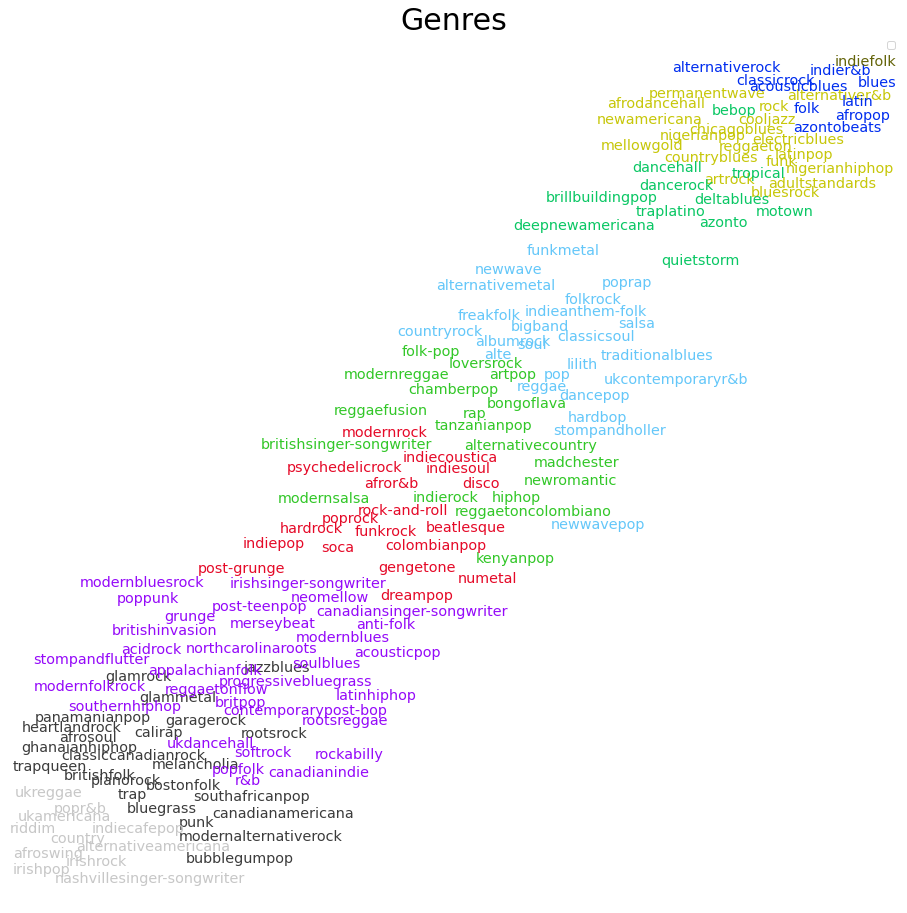

In [ ]:
from sklearn.manifold import TSNE
from adjustText import adjust_text


DarkColourPalette = [
[150,10,250],
[230,10,40], 
[100,200,250], 
[60,60,60],
[50,200,40],
[0,45,240] ,
[100,100,10], 
[200,200,10],
[10,200,100], 
[200,200,200]
]
DarkColourPalette =np.asarray(DarkColourPalette, dtype=float) / 256 


def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    plt.scatter(x,y, c=kmeans.labels_, cmap='rainbow', alpha=0)  
    
    texts = [ plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     label = str(kmeans.labels_[i]),
                     textcoords='offset points',
                     color=DarkColourPalette[kmeans.labels_[i]],
                     #cmap='rainbow',
                     ha='right',
                     va='bottom', fontsize= 'x-large') for i in range(len(x)) ]
    adjust_text(texts)
    plt.legend()
    plt.axis('off')
    plt.title('Genres',  fontsize=30)
    plt.savefig('./genres.png')
    plt.show()
    
tsne_plot(word2vec_model)

In [ ]:
pip install adjustText

In [ ]:

kmeans = cluster.AgglomerativeClustering(n_clusters = 10)
assigned_clusters  = kmeans.fit_predict(genre_df)
genre_label = assigned_clusters

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(genre_df, genre_label, test_size=0.2)

# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [1, 10, 20],
    'min_samples_leaf': [1, 2, 3],
    'min_samples_split': [2, 3, 4],
    'n_estimators': [1, 50, 100]
}

clf = RandomForestClassifier()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = clf, param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 2)
# Fit the grid search to the data
grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 5 folds for each of 144 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 284 tasks      | elapsed:   24.4s
[Parallel(n_jobs=-1)]: Done 690 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed:  1.2min finished


{'max_depth': 10,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [ ]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy


best_grid = grid_search.best_estimator_

grid_accuracy = best_grid.score(X_test, y_test)
grid_accuracy

0.9578163771712159

In [ ]:
pd.concat([pd.DataFrame(grid_search.cv_results_["params"]),pd.DataFrame(grid_search.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1)

,max_depth,min_samples_leaf,min_samples_split,n_estimators,Accuracy
0,1,1,2,1,0.316378
1,1,1,2,10,0.323829
2,1,1,2,50,0.316378
3,1,1,2,100,0.316378
4,1,1,3,1,0.307061
...,...,...,...,...,...
139,30,3,3,100,0.981388
140,30,3,4,1,0.873446
141,30,3,4,10,0.971463
142,30,3,4,50,0.978911


# Preprocess other Info

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

#function to build entire feature set
def create_other_feature_set(df, float_cols, genre_df):

    #scale float columns
    floats = df[float_cols]
    scaler = StandardScaler()
    floats_scaled = pd.DataFrame(scaler.fit_transform(floats), columns = floats.columns)

    #concanenate all features
    final = pd.concat([floats_scaled, genre_df], axis = 1)
     
    #add song id
    final['id']=df['id'].values
    
    return final


In [ ]:
other_playlists = playlists_df_edit[playlists_df_edit['username'] != 'El-Bahramino'].reset_index(drop=True)
other_genres = genre_df[playlists_df_edit['username'] != 'El-Bahramino'].reset_index(drop=True)

other_X = create_other_feature_set(other_playlists, float_cols, other_genres)

other_X

,explicit,duration,popularity,danceability,loudness,tempo,acousticness,energy,valence,liveness,speechiness,genre_0,genre_1,genre_2,genre_3,genre_4,genre_5,genre_6,genre_7,genre_8,genre_9,genre_10,genre_11,genre_12,genre_13,genre_14,genre_15,genre_16,genre_17,genre_18,genre_19,id
0,-0.318987,1.727779,1.064794,-1.196258,-0.731365,-0.898528,-1.019077,1.462964,-0.490518,1.782231,3.542793,0.093137,0.121620,0.005155,0.004502,0.188240,-0.072411,0.045648,0.354634,0.146336,0.226689,-0.075697,-0.140976,0.240850,-0.063350,-0.079597,-0.223996,-0.224445,-0.083686,-0.250646,-0.394171,0hCB0YR03f6AmQaHbwWDe8
1,-0.318987,1.727779,1.064794,-1.196258,-0.731365,-0.898528,-1.019077,1.462964,-0.490518,1.782231,3.542793,0.093137,0.121620,0.005155,0.004502,0.188240,-0.072411,0.045648,0.354634,0.146336,0.226689,-0.075697,-0.140976,0.240850,-0.063350,-0.079597,-0.223996,-0.224445,-0.083686,-0.250646,-0.394171,0hCB0YR03f6AmQaHbwWDe8
2,-0.318987,0.252423,1.064794,-1.025416,0.661415,-0.143433,-1.157923,1.039669,0.099261,-0.609224,-0.224690,0.092313,0.115485,0.011772,0.034791,0.205070,-0.104837,0.019071,0.376810,0.109524,0.206879,-0.048533,-0.093027,0.238170,-0.025807,-0.088016,-0.193369,-0.206720,-0.078685,-0.270035,-0.398323,2aoo2jlRnM3A0NyLQqMN2f
3,-0.318987,-0.233166,0.740016,-1.629935,0.802173,1.662621,-1.147385,0.878206,-0.033647,-1.055013,-0.496310,0.092313,0.115485,0.011772,0.034791,0.205070,-0.104837,0.019071,0.376810,0.109524,0.206879,-0.048533,-0.093027,0.238170,-0.025807,-0.088016,-0.193369,-0.206720,-0.078685,-0.270035,-0.398323,0NWPxcsf5vdjdiFUI8NgkP
4,-0.318987,-0.856745,0.786413,-0.401184,0.912546,-0.283225,-1.139118,1.476055,-0.224702,-0.716572,-0.081732,0.092313,0.115485,0.011772,0.034791,0.205070,-0.104837,0.019071,0.376810,0.109524,0.206879,-0.048533,-0.093027,0.238170,-0.025807,-0.088016,-0.193369,-0.206720,-0.078685,-0.270035,-0.398323,0wJoRiX5K5BxlqZTolB2LD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1944,-0.318987,0.245450,-0.698285,-0.368329,-1.395681,-1.294942,1.590092,-1.700836,-0.519592,-0.545860,-0.419332,0.125047,0.182802,0.036435,0.001953,0.295012,-0.123319,0.052703,0.450829,0.124953,0.248452,-0.056657,-0.134360,0.263917,-0.067922,-0.061854,-0.293377,-0.266034,-0.081117,-0.304178,-0.519762,4vqDFur1cyE8lS1oD3XiCB
1945,-0.318987,-0.434977,-2.461365,-0.361758,-1.446583,1.452050,1.768760,-1.321180,0.568593,1.454226,-0.489712,0.088957,0.091146,0.021738,0.004625,0.164781,-0.081703,0.029344,0.272646,0.073651,0.179516,-0.048982,-0.079746,0.148647,-0.045098,-0.024439,-0.140900,-0.141315,-0.055359,-0.178210,-0.284937,6NzOw76Vq4ogyuRGmiXG4X
1946,-0.318987,-0.090833,-1.023063,1.004982,-2.003383,-0.790946,1.753619,-1.766294,0.730575,-0.252892,-0.569988,0.066371,0.088474,0.014225,0.019351,0.165793,-0.077197,0.054311,0.253133,0.048709,0.149659,-0.031650,-0.053422,0.140733,-0.016565,-0.049427,-0.150693,-0.132896,-0.081071,-0.157062,-0.272930,1Uk2MppskA0wnHUj8JwYfC
1947,-0.318987,-0.784271,-1.162254,0.545021,-2.173747,-0.719364,1.796015,-1.041893,1.208213,-0.454167,-0.457821,0.038811,0.075972,0.016310,0.011260,0.134683,-0.058603,0.036014,0.189970,0.044959,0.092469,-0.023042,-0.050133,0.108025,-0.009694,-0.056684,-0.138699,-0.121513,-0.059688,-0.115607,-0.230244,7d89sBzsw47LbdprUMNyfJ


In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

#function to build entire feature set
def create_my_feature_set(df, float_cols, genre_df, weight_factor = 1):

    #scale float columns
    floats = df[float_cols]
    scaler = StandardScaler()
    floats_scaled = pd.DataFrame(scaler.fit_transform(floats), columns = floats.columns)

    # Date column
    date_added =  df['added_at']

    #concanenate all features
    final_df = pd.concat([floats_scaled, genre_df, date_added], axis = 1)
     
    #add song id
    final_df['id']=df['id'].values

    final_df = final_df.sort_values('added_at',ascending=False).reset_index(drop=True)

    most_recent_date = final_df.loc[0,'added_at']
    
    # Calculate how many months ago each item was added from the last item in playlist
    for ix, row in final_df.iterrows():
        final_df.loc[ix,'months_from_recent'] = int((most_recent_date.to_pydatetime() - row['added_at'].to_pydatetime()).days / 30)
        
    final_df['weight'] = final_df['months_from_recent'].apply(lambda x: weight_factor ** (-x))
    
    final_df = final_df.drop(columns = ['months_from_recent', 'added_at'])

    return final_df


In [ ]:
my_playlists = playlists_df_edit[playlists_df_edit['username'] == 'El-Bahramino'].reset_index(drop=True)
my_genres = genre_df[playlists_df_edit['username'] == 'El-Bahramino'].reset_index(drop=True)

my_X = create_my_feature_set(my_playlists, float_cols, my_genres, weight_factor = 2)

my_X

,explicit,duration,popularity,danceability,loudness,tempo,acousticness,energy,valence,liveness,speechiness,genre_0,genre_1,genre_2,genre_3,genre_4,genre_5,genre_6,genre_7,genre_8,genre_9,genre_10,genre_11,genre_12,genre_13,genre_14,genre_15,genre_16,genre_17,genre_18,genre_19,id,weight
0,0.0,0.583448,0.825736,-0.031217,-0.414708,-1.535043,-0.702049,-0.291030,-1.270731,0.457617,-0.416799,0.184408,0.198437,0.033560,-0.005931,0.316851,-0.158611,0.026853,0.544401,0.179734,0.334788,-0.074567,-0.185955,0.323007,-0.063150,-0.061806,-0.296959,-0.307341,-0.110568,-0.386182,-0.596578,5MTsZG10E0hTvAkdioyPnw,1.000
1,0.0,0.559381,-1.641278,0.763335,1.604591,0.091759,-1.487118,0.782395,-0.662603,0.786600,-0.407444,0.013941,0.048912,0.011511,0.025471,0.065078,-0.000506,0.030784,0.103803,0.030583,0.051824,-0.008337,-0.042790,0.057831,-0.022960,0.009741,-0.035787,-0.061073,-0.003008,-0.076185,-0.085013,6CsdPQAmXxGozOfUK4TJWp,1.000
2,0.0,-0.702257,-1.641278,-1.093698,0.178781,0.422169,-1.950405,0.019826,-0.737286,0.743689,-0.337805,0.103283,0.136884,0.002163,0.012859,0.213940,-0.102560,0.046503,0.379711,0.142632,0.238063,-0.046224,-0.154443,0.253350,-0.053281,-0.071299,-0.205750,-0.249726,-0.084834,-0.275458,-0.414417,7rea8oiI7zkZI5dbigK06f,1.000
3,0.0,-0.668502,-0.385343,0.938875,-1.362856,-0.767224,1.042549,-0.388173,1.348484,-0.472116,-0.293111,0.038811,0.075972,0.016310,0.011260,0.134683,-0.058603,0.036014,0.189970,0.044959,0.092469,-0.023042,-0.050133,0.108025,-0.009694,-0.056684,-0.138699,-0.121513,-0.059688,-0.115607,-0.230244,7d89sBzsw47LbdprUMNyfJ,1.000
4,0.0,-0.903311,1.453703,-0.908918,1.374217,-1.213596,0.108866,0.121826,0.174905,-0.143133,-0.464611,0.060771,0.098451,0.017124,0.020937,0.135059,-0.045682,0.016453,0.272040,0.100694,0.152984,-0.041384,-0.098366,0.158070,-0.045598,-0.020698,-0.117482,-0.142173,-0.052448,-0.182781,-0.269628,1kPBT8S2wJFNAyBMnGVZgL,1.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,0.0,-0.992219,0.736026,0.920397,-0.031605,-0.703053,0.887474,-0.470744,0.318935,-0.493572,-0.175658,0.148664,0.192114,0.037023,0.022787,0.304233,-0.130570,0.055780,0.511235,0.128641,0.281468,-0.052942,-0.140917,0.304763,-0.039822,-0.076453,-0.304931,-0.294334,-0.117717,-0.342038,-0.558193,1TrGdXSgiBm8W68D2K1COG,0.125
62,0.0,-0.646604,0.108059,0.356820,-0.050568,-0.958935,1.100702,-1.775853,-1.958875,0.085724,-0.165264,0.107869,0.105848,0.021492,0.010189,0.164664,-0.075088,0.052676,0.301795,0.079729,0.185113,-0.038029,-0.085762,0.165615,-0.036194,-0.026683,-0.155142,-0.143326,-0.087105,-0.204937,-0.310184,2wAfHM7Whz67VFbdanhZlk,0.125
63,0.0,2.582130,1.588267,-0.234474,0.027334,-0.468446,-1.309427,1.525535,0.735023,-0.436357,-0.427193,0.068553,0.097807,0.002203,0.033559,0.170114,-0.083718,0.014874,0.304803,0.097753,0.161927,-0.039006,-0.078621,0.194882,-0.023147,-0.084515,-0.166313,-0.175589,-0.059923,-0.230640,-0.332910,14XWXWv5FoCbFzLksawpEe,0.125
64,0.0,0.285464,0.780881,1.955161,-0.742460,-0.395765,0.393171,-0.742743,0.116226,-0.500723,-0.306623,0.090002,0.098359,0.007380,-0.002261,0.178401,-0.050907,0.066389,0.313894,0.076139,0.184713,-0.034708,-0.094728,0.196791,-0.041350,-0.052653,-0.160884,-0.178913,-0.053088,-0.211523,-0.323254,4rxamav7i2lJexbuAxcvfe,0.125


Save datasets :)

In [ ]:
my_X.to_csv('./spotify_recom_mine.csv', index=False)
other_X.to_csv('./spotify_recom_others.csv', index=False)

# Content based recommendation

In [ ]:
my_X = pd.read_csv('./spotify_recom_mine.csv')
other_X = pd.read_csv('./spotify_recom_others.csv')

In [ ]:
my_X_weighted = my_X.copy()

#Weighted content based
my_X_weighted.update(my_X_weighted.drop(columns=['id', 'weight']).mul(my_X_weighted['weight'],0))
my_X_weighted

,explicit,duration,popularity,danceability,loudness,tempo,acousticness,energy,valence,liveness,speechiness,genre_0,genre_1,genre_2,genre_3,genre_4,genre_5,genre_6,genre_7,genre_8,genre_9,genre_10,genre_11,genre_12,genre_13,genre_14,genre_15,genre_16,genre_17,genre_18,genre_19,id,weight
0,0.0,0.583448,0.825736,-0.031217,-0.414708,-1.535043,-0.702049,-0.291030,-1.270731,0.457617,-0.416799,-0.172894,0.425044,0.101748,0.169034,-0.128342,0.208138,0.451082,-0.160446,0.113476,-0.298386,-0.333179,-0.359223,0.140400,-0.437904,-0.039814,0.390566,-0.559049,0.120963,-0.409753,-0.035908,5MTsZG10E0hTvAkdioyPnw,1.000
1,0.0,0.559381,-1.641278,0.763335,1.604591,0.091759,-1.487118,0.782395,-0.662603,0.786600,-0.407444,-0.050375,0.077760,0.008547,0.027071,-0.003714,0.052040,0.095517,-0.012150,0.038808,-0.051762,-0.062527,-0.030715,0.046936,-0.089608,-0.010689,0.079021,-0.073101,0.015722,-0.035543,-0.021251,6CsdPQAmXxGozOfUK4TJWp,1.000
2,0.0,-0.702257,-1.641278,-1.093698,0.178781,0.422169,-1.950405,0.019826,-0.737286,0.743689,-0.337805,-0.110726,0.298375,0.071034,0.115853,-0.082633,0.118371,0.353102,-0.138352,0.106696,-0.197609,-0.222569,-0.253208,0.068566,-0.325852,-0.030387,0.313864,-0.400693,0.106613,-0.275297,-0.033599,7rea8oiI7zkZI5dbigK06f,1.000
3,0.0,-0.668502,-0.385343,0.938875,-1.362856,-0.767224,1.042549,-0.388173,1.348484,-0.472116,-0.293111,-0.084087,0.161002,0.014594,0.039735,-0.049497,0.070533,0.167642,-0.062110,0.031030,-0.111853,-0.115955,-0.161314,0.038940,-0.171958,-0.001397,0.159692,-0.215537,0.065590,-0.168340,-0.027193,7d89sBzsw47LbdprUMNyfJ,1.000
4,0.0,-0.903311,1.453703,-0.908918,1.374217,-1.213596,0.108866,0.121826,0.174905,-0.143133,-0.464611,-0.111620,0.200439,0.042576,0.067219,-0.040962,0.089356,0.238087,-0.088964,0.067452,-0.123432,-0.163423,-0.126262,0.078423,-0.218824,-0.024572,0.201861,-0.276533,0.053025,-0.179354,-0.048739,1kPBT8S2wJFNAyBMnGVZgL,1.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,0.0,-0.124027,0.092003,0.115050,-0.003951,-0.087882,0.110934,-0.058843,0.039867,-0.061696,-0.021957,-0.022055,0.050538,0.009015,0.015851,-0.014126,0.022245,0.055180,-0.017694,0.013892,-0.032179,-0.040032,-0.042800,0.018348,-0.051460,-0.003018,0.048644,-0.064619,0.014854,-0.050410,-0.005101,1TrGdXSgiBm8W68D2K1COG,0.125
62,0.0,-0.080826,0.013507,0.044603,-0.006321,-0.119867,0.137588,-0.221982,-0.244859,0.010716,-0.020658,-0.015973,0.029681,0.005844,0.008727,-0.006564,0.010398,0.031380,-0.009894,0.009449,-0.016347,-0.020684,-0.021661,0.012314,-0.028995,-0.006847,0.025408,-0.038635,0.004172,-0.026557,-0.003088,2wAfHM7Whz67VFbdanhZlk,0.125
63,0.0,0.322766,0.198533,-0.029309,0.003417,-0.058556,-0.163678,0.190692,0.091878,-0.054545,-0.053399,-0.010842,0.024352,0.006289,0.010744,-0.009840,0.014750,0.029324,-0.007966,0.006597,-0.018062,-0.020676,-0.020499,0.008652,-0.027539,-0.002333,0.030433,-0.036022,0.007937,-0.024927,-0.003028,14XWXWv5FoCbFzLksawpEe,0.125
64,0.0,0.035683,0.097610,0.244395,-0.092807,-0.049471,0.049146,-0.092843,0.014528,-0.062590,-0.038328,-0.011319,0.028767,0.009836,0.011359,-0.011069,0.010672,0.029878,-0.012446,0.006444,-0.022813,-0.020270,-0.024809,0.008027,-0.032714,-0.005521,0.030889,-0.037528,0.006453,-0.025453,-0.001279,4rxamav7i2lJexbuAxcvfe,0.125


In [ ]:
### Weighted!!!!!

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

cosine = cosine_similarity(other_X.drop(columns=['id']).values, my_X.drop(columns=['id', 'weight']).values)


weights = my_X['weight']
#Weighted content based (2000x9 . 9x1)
new_cosine = np.dot(cosine, weights)
other_X['sim'] = new_cosine

In [ ]:
pip install spotipy

In [ ]:
CLIENT_ID = '0e770993e5954933897cfbd6fab1cf34'
CLIENT_SECRET = 'd1ce006764bd44fab215fbc7324d18d7'

import pandas as pd
import numpy as np

import spotipy
import spotipy.util as util
from spotipy.oauth2 import SpotifyClientCredentials
from spotipy.oauth2 import SpotifyOAuth
client_credentials_manager = SpotifyClientCredentials(client_id=CLIENT_ID,client_secret=CLIENT_SECRET)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)


top_40 = other_X.sort_values('sim',ascending = False).head(40).drop_duplicates()
uuuu = top_40['id'].apply(lambda x: sp.track(x)['name'])
yyyy = top_40['id'].apply(lambda x: sp.track(x)["album"]["artists"][0]["name"])

In [ ]:
list(zip(uuuu, yyyy))[:10]

[('Into the Mystic - 2013 Remaster', 'Van Morrison'),
 ('Free Mind', 'Tems'),
 ('God Only Knows - Remastered', 'The Beach Boys'),
 ('The Hunt', 'River Whyless'),
 ('FOR YOU', 'Teni'),
 ('Blood Hunters', 'Andrew Combs'),
 ('Long Blue Light', 'Leif Vollebekk'),
 ('Quiéreme', 'Mike Bahía'),
 ('Johnny', 'Sarah Jarosz'),
 ('Stumble', 'Freddie King')]

[('Into the Mystic - 2013 Remaster', 'Van Morrison'),
 ('Free Mind', 'Tems'),
 ('God Only Knows - Remastered', 'The Beach Boys'),
 ('The Hunt', 'River Whyless'),
 ('FOR YOU', 'Teni'),
 ('Blood Hunters', 'Andrew Combs'),
 ('Long Blue Light', 'Leif Vollebekk'),
 ('Quiéreme', 'Mike Bahía'),
 ('Johnny', 'Sarah Jarosz'),
 ('Stumble', 'Freddie King')]

#### not weighted

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

cosine = cosine_similarity(other_X.drop(columns=['id', 'sim']).values, my_X.drop(columns=['id', 'weight']).values)

other_X['sim'] = cosine

In [ ]:
top_40 = other_X.sort_values('sim',ascending = False).head(40).drop_duplicates()
uuuu = top_40['id'].apply(lambda x: sp.track(x)['name'])
yyyy = top_40['id'].apply(lambda x: sp.track(x)["album"]["artists"][0]["name"])

In [ ]:
list(zip(uuuu, yyyy))[:10]

[('Every Time the Sun Comes Up', 'Sharon Van Etten'),
 ('Do I Wanna Know?', 'Arctic Monkeys'),
 ('Feels Like Rain', 'Buddy Guy'),
 ('I Want to Know What Love Is - 1999 Remaster', 'Foreigner'),
 ('Under the Bridge', 'Red Hot Chili Peppers'),
 ('Every Little Thing She Does Is Magic', 'The Police'),
 ('The Freshmen', 'The Verve Pipe'),
 ('Ironic', 'Alanis Morissette'),
 ('Midnight Train to Georgia', 'Gladys Knight & The Pips'),
 ('With Or Without You - Remastered', 'U2')]

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(y_actual, cosine))

array([[ 0.34015308,  0.0098377 ,  0.06394711, ...,  0.41566737,
        -0.22914808,  0.2260679 ],
       [ 0.34015308,  0.0098377 ,  0.06394711, ...,  0.41566737,
        -0.22914808,  0.2260679 ],
       [ 0.31623359,  0.11266088,  0.22142889, ...,  0.69649488,
        -0.27988375,  0.76530892],
       ...,
       [ 0.02545846, -0.43171146, -0.29267308, ..., -0.37833365,
         0.58192627, -0.77955252],
       [-0.13588898, -0.50363845, -0.25262693, ..., -0.42151065,
         0.42386585, -0.66460806],
       [-0.09125934,  0.01799862,  0.18723471, ..., -0.34527209,
         0.31763723, -0.46101863]])

In [ ]:
other_X['sim']

0       0.340153
1       0.340153
2       0.316234
3      -0.115224
4       0.211729
          ...   
1944    0.357083
1945   -0.326874
1946    0.025458
1947   -0.135889
1948   -0.091259
Name: sim, Length: 1949, dtype: float64

# Colaborative Filtering

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
playlists_df = pd.read_csv('./spotify_recom.csv')
playlists_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2261 entries, 0 to 2260
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             2261 non-null   object 
 1   playlist_id    2261 non-null   object 
 2   playlist_name  2261 non-null   object 
 3   artist_name    2261 non-null   object 
 4   artistid       2261 non-null   object 
 5   name           2261 non-null   object 
 6   username       70 non-null     object 
 7   added_at       2261 non-null   object 
 8   explicit       2261 non-null   bool   
 9   duration       2261 non-null   int64  
 10  popularity     2261 non-null   int64  
 11  danceability   2223 non-null   float64
 12  loudness       2223 non-null   float64
 13  tempo          2223 non-null   float64
 14  acousticness   2223 non-null   float64
 15  energy         2223 non-null   float64
 16  valence        2223 non-null   float64
 17  liveness       2223 non-null   float64
 18  speechin

In [ ]:
playlists_df

,id,playlist_id,playlist_name,artist_name,artistid,name,username,added_at,explicit,duration,popularity,danceability,loudness,tempo,acousticness,energy,valence,liveness,speechiness,genres
0,0hCB0YR03f6AmQaHbwWDe8,spotify:playlist:37i9dQZF1DWXRqgorJj26U,Rock Classics,Led Zeppelin,https://open.spotify.com/artist/36QJpDe2go2Kga...,Whole Lotta Love - 1990 Remaster,NaN,2020-08-17,False,333893,76,0.412,-11.600,89.740,0.04840,0.902,0.422,0.4050,0.4050,"['album rock', 'classic rock', 'hard rock', 'r..."
1,0hCB0YR03f6AmQaHbwWDe8,spotify:playlist:37i9dQZF1DWYE5MI4mMuii,Rock & Roll Party,Led Zeppelin,https://open.spotify.com/artist/36QJpDe2go2Kga...,Whole Lotta Love - 1990 Remaster,NaN,2020-08-21,False,333893,76,0.412,-11.600,89.740,0.04840,0.902,0.422,0.4050,0.4050,"['album rock', 'classic rock', 'hard rock', 'r..."
2,2aoo2jlRnM3A0NyLQqMN2f,spotify:playlist:37i9dQZF1DWXRqgorJj26U,Rock Classics,Jimi Hendrix,https://open.spotify.com/artist/776Uo845nYHJpN...,All Along the Watchtower,NaN,2020-08-17,False,240800,76,0.438,-6.237,113.253,0.00255,0.805,0.564,0.0842,0.0624,"['acid rock', 'blues rock', 'classic rock', 'p..."
3,0NWPxcsf5vdjdiFUI8NgkP,spotify:playlist:37i9dQZF1DWXRqgorJj26U,Rock Classics,Jimi Hendrix,https://open.spotify.com/artist/776Uo845nYHJpN...,Hey Joe,NaN,2020-08-17,False,210160,69,0.346,-5.695,169.492,0.00603,0.768,0.532,0.0244,0.0377,"['acid rock', 'blues rock', 'classic rock', 'p..."
4,0wJoRiX5K5BxlqZTolB2LD,spotify:playlist:37i9dQZF1DWXRqgorJj26U,Rock Classics,Jimi Hendrix,https://open.spotify.com/artist/776Uo845nYHJpN...,Purple Haze,NaN,2020-08-17,False,170813,70,0.533,-5.270,108.900,0.00876,0.905,0.486,0.0698,0.0754,"['acid rock', 'blues rock', 'classic rock', 'p..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2256,30A3vEsySPkeXzXeMITvwE,spotify:playlist:6RzzvekKhU0W3q66dZosP8,low down groovin,Tinariwen,https://open.spotify.com/artist/2sf2owtFSCvz2M...,Tiwàyyen,El-Bahramino,2020-11-10,False,224400,32,0.460,-8.709,126.437,0.14600,0.622,0.331,0.1150,0.0560,"['afrobeat', 'afropop', 'desert blues', 'malia..."
2257,36OpkSbeJVaADUgJynvdht,spotify:playlist:6RzzvekKhU0W3q66dZosP8,low down groovin,Boubacar Traoré,https://open.spotify.com/artist/63Bilw49Uv4s2w...,Hona,El-Bahramino,2020-11-10,False,338746,39,0.429,-10.092,183.624,0.58700,0.455,0.597,0.1180,0.0369,"['afropop', 'malian blues', 'mande pop', 'world']"
2258,61AJlCxahP7OhPjYojRvN6,spotify:playlist:6RzzvekKhU0W3q66dZosP8,low down groovin,Boubacar Traoré,https://open.spotify.com/artist/63Bilw49Uv4s2w...,M'Badehou,El-Bahramino,2020-11-10,False,367040,36,0.473,-9.865,125.584,0.88700,0.421,0.727,0.1050,0.0315,"['afropop', 'malian blues', 'mande pop', 'world']"
2259,05CF4ATpqROLTQVYABNZ3W,spotify:playlist:6RzzvekKhU0W3q66dZosP8,low down groovin,Rokia Traoré,https://open.spotify.com/artist/6sz0k1q2aEtG5d...,Laidu,El-Bahramino,2020-11-10,False,386973,51,0.702,-15.172,99.747,0.62600,0.269,0.397,0.1250,0.0365,"['afropop', 'malian blues', 'mande pop', 'world']"


In [ ]:
from sklearn.preprocessing import OneHotEncoder
#one hot encode the songs 
song_encoder = OneHotEncoder(handle_unknown='ignore')
sp_matrix = song_encoder.fit_transform(playlists_df['id'].to_numpy().reshape(-1, 1))
np.shape(sp_matrix)


(2261, 1090)

In [ ]:
# Create dataframe
interaction_df = pd.DataFrame.sparse.from_spmatrix(sp_matrix)
interaction_df.columns = song_encoder.get_feature_names()

interaction_df['playlist_name'] = playlists_df['playlist_name']

In [ ]:
interaction_df

,x0_00C5llfInrmXgjBrT40L1J,x0_00CmjeeHvAVKvx3tcIiZTy,x0_00Ro1lnV3V6i87aY4t8Q43,x0_01NSrsQkOZ3PgRcGLGrOT5,x0_01u6AEzGbGbQyYVdxajxqk,x0_01zjFKZ2qDYDXJsNSmVm0i,x0_02Msss3kY3GSGgeY8oUGMF,x0_02rJkUdpakfTgzB1F4stRV,x0_04LtT3aIQTrKUpVR9UG3OL,x0_04O45djDgdvw08HOkouSKW,x0_05CF4ATpqROLTQVYABNZ3W,x0_064SVQsmWl5EF0zahmzkQk,x0_06seDLtwax1URGUWMM1Tzb,x0_07VOlyshShGMYBPgjTIZoz,x0_07szkonLuTbeURbDjFCxGb,x0_0A1hoCfMLkiAgvhWkkucJa,x0_0Bc66CwO7NENnqW60RBDzG,x0_0BcCVtBus5fmRraeC5YR3y,x0_0C0ESa1ZZ5taXaYUxwnvx9,x0_0C8RxBixBaXYc5enAXIm28,x0_0COqiPhxzoWICwFCS4eZcp,x0_0CmQgwV3Bmzh9nZb9TNVEI,x0_0D75ciM842cdUMKSMfAR9y,x0_0Dp07EA5ybveKSUE27CuEd,x0_0EMLtepZpcY9T64AVEmyyv,x0_0EXdNsNOxZH1TLzBYUgY55,x0_0EjyqL8DHNjH6uxdolgYtc,x0_0FbKvqTBo2TsSzhT5ohFI2,x0_0GF9zxH5xAhKiRQQJTb9VZ,x0_0GMzxdm0Pc3lU14JmDlxN8,x0_0GONea6G2XdnHWjNZd6zt3,x0_0GehqN1MkS7feXJWWk97KU,x0_0HC6S4VpCGAZvyxTdrMRIQ,x0_0HeNDXMTdBDS9eWQkhENJ2,x0_0I74VCDu3RbCMuyToTUtzl,x0_0J6FHapcDl46B8G4I3XcY9,x0_0LIZVQBQtDi4lLhB83qJIp,x0_0LrwgdLsFaWh9VXIjBRe8t,x0_0MpfX3Q5omIiuREWGeLLwF,x0_0NSqOUjf55rgVEqN7e9fhb,...,x0_7jIcZC9pSpkAuokhCZOtLn,x0_7jL2tCE0Xn2tunqWayBkte,x0_7kXo7sb4Lz9sBNW5KT8Zk7,x0_7lpsRa4kcNoxSHUDNDXpnn,x0_7mDgRy36arEHxxsOOGPB2m,x0_7mnGQesk1TzQLzQ9bYWZPR,x0_7n4zQp0b3vnsmcjmEfLo2r,x0_7nDIflSHQXzaa8zupxwv3U,x0_7ndTONDDRFGiPnnhOzOXxq,x0_7nnWIPM5hwE3DaUBkvOIpy,x0_7nxIBClhF3MK4aYC7TiCWy,x0_7o2CTH4ctstm8TNelqjb51,x0_7o4gBbTM6UBLkOYPw9xMCz,x0_7oK9VyNzrYvRFo7nQEYkWN,x0_7ohR0qPH6f2Vuj2pUNanJG,x0_7oqDaJiG7dUvf7oIQrzGGF,x0_7pKfPomDEeI4TPT6EOYjn9,x0_7pT3faDXSC5tNAlIKmtrYf,x0_7rea8oiI7zkZI5dbigK06f,x0_7rzl3uAXLQMWznyVUaoeer,x0_7s489YdEjOl8mGcSRFLgzi,x0_7sJIqdSLw7lvQUsX2NOxJB,x0_7shVwhUdVbHpykOfbzvDc1,x0_7sheAObhEOIqDY8YFu3HJf,x0_7snQQk1zcKl8gZ92AnueZW,x0_7tk9ZylxkJReNIavPPhqzj,x0_7tkOm1ZNcIg4lKu0XCQgCq,x0_7tqhbajSfrz2F7E1Z75ASX,x0_7uX7niEFrJFmj3SFHsnwkL,x0_7uXwbnpGfGRwlB7CWeC6Aw,x0_7upm07Y3Fx4AJs5G5OqG1A,x0_7urDSX97YCwDNjzgrHHAnD,x0_7voiKv7nCbpQkF9jcN4VPn,x0_7vrJn5hDSXRmdXoR30KgF1,x0_7x4ASXYEKfQBCewcZhK776,x0_7yJG5oJwYfom8AVXDcgFLx,x0_7yWcDUgTm9RLNxjPPHXVxp,x0_7ysmJhXFQtiBQlk6EZ6sks,x0_7ywUfT35DxrKOoq7ZL0VQ5,playlist_name
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Rock Classics
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Rock & Roll Party
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Rock Classics
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Rock Classics
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Rock Classics
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [ ]:
interaction_df = interaction_df.groupby(['playlist_name']).sum()
interaction_df

,x0_00C5llfInrmXgjBrT40L1J,x0_00CmjeeHvAVKvx3tcIiZTy,x0_00Ro1lnV3V6i87aY4t8Q43,x0_01NSrsQkOZ3PgRcGLGrOT5,x0_01u6AEzGbGbQyYVdxajxqk,x0_01zjFKZ2qDYDXJsNSmVm0i,x0_02Msss3kY3GSGgeY8oUGMF,x0_02rJkUdpakfTgzB1F4stRV,x0_04LtT3aIQTrKUpVR9UG3OL,x0_04O45djDgdvw08HOkouSKW,x0_05CF4ATpqROLTQVYABNZ3W,x0_064SVQsmWl5EF0zahmzkQk,x0_06seDLtwax1URGUWMM1Tzb,x0_07VOlyshShGMYBPgjTIZoz,x0_07szkonLuTbeURbDjFCxGb,x0_0A1hoCfMLkiAgvhWkkucJa,x0_0Bc66CwO7NENnqW60RBDzG,x0_0BcCVtBus5fmRraeC5YR3y,x0_0C0ESa1ZZ5taXaYUxwnvx9,x0_0C8RxBixBaXYc5enAXIm28,x0_0COqiPhxzoWICwFCS4eZcp,x0_0CmQgwV3Bmzh9nZb9TNVEI,x0_0D75ciM842cdUMKSMfAR9y,x0_0Dp07EA5ybveKSUE27CuEd,x0_0EMLtepZpcY9T64AVEmyyv,x0_0EXdNsNOxZH1TLzBYUgY55,x0_0EjyqL8DHNjH6uxdolgYtc,x0_0FbKvqTBo2TsSzhT5ohFI2,x0_0GF9zxH5xAhKiRQQJTb9VZ,x0_0GMzxdm0Pc3lU14JmDlxN8,x0_0GONea6G2XdnHWjNZd6zt3,x0_0GehqN1MkS7feXJWWk97KU,x0_0HC6S4VpCGAZvyxTdrMRIQ,x0_0HeNDXMTdBDS9eWQkhENJ2,x0_0I74VCDu3RbCMuyToTUtzl,x0_0J6FHapcDl46B8G4I3XcY9,x0_0LIZVQBQtDi4lLhB83qJIp,x0_0LrwgdLsFaWh9VXIjBRe8t,x0_0MpfX3Q5omIiuREWGeLLwF,x0_0NSqOUjf55rgVEqN7e9fhb,...,x0_7jIFGkTBIK1UwWaEXMW2Nh,x0_7jIcZC9pSpkAuokhCZOtLn,x0_7jL2tCE0Xn2tunqWayBkte,x0_7kXo7sb4Lz9sBNW5KT8Zk7,x0_7lpsRa4kcNoxSHUDNDXpnn,x0_7mDgRy36arEHxxsOOGPB2m,x0_7mnGQesk1TzQLzQ9bYWZPR,x0_7n4zQp0b3vnsmcjmEfLo2r,x0_7nDIflSHQXzaa8zupxwv3U,x0_7ndTONDDRFGiPnnhOzOXxq,x0_7nnWIPM5hwE3DaUBkvOIpy,x0_7nxIBClhF3MK4aYC7TiCWy,x0_7o2CTH4ctstm8TNelqjb51,x0_7o4gBbTM6UBLkOYPw9xMCz,x0_7oK9VyNzrYvRFo7nQEYkWN,x0_7ohR0qPH6f2Vuj2pUNanJG,x0_7oqDaJiG7dUvf7oIQrzGGF,x0_7pKfPomDEeI4TPT6EOYjn9,x0_7pT3faDXSC5tNAlIKmtrYf,x0_7rea8oiI7zkZI5dbigK06f,x0_7rzl3uAXLQMWznyVUaoeer,x0_7s489YdEjOl8mGcSRFLgzi,x0_7sJIqdSLw7lvQUsX2NOxJB,x0_7shVwhUdVbHpykOfbzvDc1,x0_7sheAObhEOIqDY8YFu3HJf,x0_7snQQk1zcKl8gZ92AnueZW,x0_7tk9ZylxkJReNIavPPhqzj,x0_7tkOm1ZNcIg4lKu0XCQgCq,x0_7tqhbajSfrz2F7E1Z75ASX,x0_7uX7niEFrJFmj3SFHsnwkL,x0_7uXwbnpGfGRwlB7CWeC6Aw,x0_7upm07Y3Fx4AJs5G5OqG1A,x0_7urDSX97YCwDNjzgrHHAnD,x0_7voiKv7nCbpQkF9jcN4VPn,x0_7vrJn5hDSXRmdXoR30KgF1,x0_7x4ASXYEKfQBCewcZhK776,x0_7yJG5oJwYfom8AVXDcgFLx,x0_7yWcDUgTm9RLNxjPPHXVxp,x0_7ysmJhXFQtiBQlk6EZ6sks,x0_7ywUfT35DxrKOoq7ZL0VQ5
playlist_name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
00s Rock Anthems,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
80s Love Songs,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
80s Summer Rock,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
90s Acoustic,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
90s Rock Anthems,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

## Cosine similarity

In [ ]:
#Cosine similarity vector

from sklearn.metrics.pairwise import cosine_similarity

myuser = interaction_df.loc['low down groovin']
others = interaction_df.drop( index='low down groovin', axis = 0)

cosine = cosine_similarity(others.values, myuser.values.to_dense().reshape(1, -1))
cosine.shape

(86, 1)

In [ ]:
# K nearest playlists (5)
k_nearest = cosine.reshape(-1).argsort()[::-1][:5]

In [ ]:
print(interaction_df.iloc[k_nearest].index)

Index(['Blues Origins', 'Blues Classics', 'Delta Blues', 'Crossroad Blues',
       'Chicago Blues'],
      dtype='object', name='playlist_name')


In [ ]:
CLIENT_ID = '0e770993e5954933897cfbd6fab1cf34'
CLIENT_SECRET = 'd1ce006764bd44fab215fbc7324d18d7'

import spotipy
import spotipy.util as util
from spotipy.oauth2 import SpotifyClientCredentials
from spotipy.oauth2 import SpotifyOAuth
client_credentials_manager = SpotifyClientCredentials(client_id=CLIENT_ID,client_secret=CLIENT_SECRET)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)


song_ids = song_encoder.get_feature_names()

for neighbor in k_nearest:
  similar_songs = song_ids[interaction_df.iloc[neighbor] > myuser]
  track_names = [sp.track(x[3:])['name'] for x in similar_songs]
  artist_names = [sp.track(x[3:])["album"]["artists"][0]["name"] for x in similar_songs]
  print(interaction_df.index[neighbor])
  print(list(zip(track_names, artist_names)))

Blues Origins
[('All Around Man', 'Bo Carter'), ("I Can't Quit You Baby", 'Otis Rush'), ('Devil Got My Woman', 'Skip James'), ("Don't Start Me To Talkin'", 'Sonny Boy Williamson II'), ('Lead Pencil Blues (1935)', 'Various Artists'), ('Down The Dirt Road Blues', 'Charley Patton'), ("I'm A Man - Single Version", 'Bo Diddley'), ('All Your Love', 'Magic Sam'), ('Catfish Blues', 'Various Artists')]
Blues Classics
[("You Don't Want Me", 'Earl Hooker'), ("Don't Start Me To Talkin'", 'Sonny Boy Williamson II'), ('Two Bugs And A Roach', 'Earl Hooker'), ('Be Careful With a Fool', 'Johnny Winter'), ('Should I Wait', 'Luther Allison'), ('Scratch My Back', 'The Fabulous Thunderbirds'), ('All Your Love', 'Magic Sam'), ('Cold, Cold Feeling', 'Albert Collins')]
Delta Blues
[('All Around Man', 'Bo Carter'), ('Coffee Blues', 'Mississippi John Hurt'), ('Devil Got My Woman', 'Skip James'), ('Lead Pencil Blues (1935)', 'Various Artists'), ('Down The Dirt Road Blues', 'Charley Patton'), ('Devil Sent The Rai

In [ ]:
pip install surprise

In [ ]:
from surprise import KNNBasic
import surprise as su
from surprise.model_selection import cross_validate

playlists_df['rating'] = 1
reader = su.Reader(rating_scale=(0, 1))

sim_options = {'name': 'cosine',
               'user_based': True  # compute  similarities between items
               }

data = su.Dataset.load_from_df(playlists_df[['playlist_name', 'id', 'rating']], reader= reader)
trainset = data.build_full_trainset()
knn = KNNBasic(sim_options = sim_options)


cross_validate(knn, data, measures=['RMSE', 'MAE'], cv=3, verbose=True)
knn.fit(trainset)


### Generate recommendation:

myuser = playlists_df[playlists_df['playlist_name'] == 'low down groovin']
others = playlists_df[playlists_df['playlist_name'] != 'low down groovin']

ratings = []
for index, song in others.iterrows():
  rating = knn.predict('Rock Classics', song['id']).est

  ratings.append(rating)

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.0000  0.0000  0.0000  0.0000  0.0000  
MAE (testset)     0.0000  0.0000  0.0000  0.0000  0.0000  
Fit time          0.00    0.00    0.00    0.00    0.00    
Test time         0.01    0.01    0.01    0.01    0.00    
Computing the cosine similarity matrix...
Done computing similarity matrix.


In [ ]:
nearest_40 = np.asarray(ratings).reshape(-1).argsort()[::-1][:40]

NameError: ignored

In [ ]:
song = others.iloc[nearest_40]['id']
playlist = others.iloc[nearest_40]['playlist_name']
track_names = [sp.track(x)['name'] for x in song]
artist_names = [sp.track(x)["album"]["artists"][0]["name"] for x in song]

print(list(zip(playlist, track_names, artist_names)))

[('Delta Blues', 'By The Spoonful', 'J.D. Short'), ('Sound Of Motown', 'Baby I Need Your Loving', 'Four Tops'), ('Classic Acoustic', 'The Weight', 'The Band'), ('Evolution Of Soul', 'Where Did Our Love Go', 'The Supremes'), ('Motown Soul Number Ones', 'Baby Love', 'The Supremes'), ('Motown Soul Number Ones', 'Where Did Our Love Go', 'The Supremes'), ('All Out 60s', 'Baby Love', 'The Supremes'), ('All Out 60s', "You Can't Hurry Love", 'The Supremes'), ('All Out 60s', 'Baby I Need Your Loving', 'Four Tops'), ('80s Love Songs', 'Love Changes (Everything)', 'Climie Fisher'), ('90s Acoustic', 'Stay', 'Lisa Loeb & Nine Stories'), ('All Out 90s', 'Stay', 'Lisa Loeb & Nine Stories'), ('90s Acoustic', 'Nothing Compares 2 U', "Sinéad O'Connor"), ('All Out 90s', 'Nothing Compares 2 U', "Sinéad O'Connor"), ('Alternative 90s', 'There She Goes', "The La's"), ('All Out 90s', 'There She Goes', "The La's"), ('Essential Folk', 'The Weight', 'The Band'), ('Motown Soul Number Ones', '(Love Is Like A) Heat

In [ ]:
## Problem?? Very high dimensional!
# Fix by matrix factorization

## Matrix Factorization

In [ ]:
pip install scikit-surprise

     |████████████████████████████████| 11.8MB 8.6MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp37-cp37m-linux_x86_64.whl size=1615287 sha256=158b8109e9022081b9ead03552a59592005cc7751668e94d59868cbaa92a18fc
  Stored in directory: /root/.cache/pip/wheels/78/9c/3d/41b419c9d2aff5b6e2b4c0fc8d25c538202834058f9ed110d0
Successfully built scikit-surprise


In [ ]:
import surprise as su

playlists_df['rating'] = 1
playlists_df['rating']

0       1
1       1
2       1
3       1
4       1
       ..
2256    1
2257    1
2258    1
2259    1
2260    1
Name: rating, Length: 2261, dtype: int64

In [ ]:
reader = su.Reader(rating_scale=(0, 1))
data = su.Dataset.load_from_df(playlists_df[['playlist_name', 'id', 'rating']], reader= reader)
trainset = data.build_full_trainset()
SVD_matrix_fac = su.SVD(n_epochs = 10, n_factors=20)

In [ ]:
from surprise.model_selection import cross_validate

cross_validate(SVD_matrix_fac, data, measures=['RMSE', 'MAE'], cv=3, verbose=True)
SVD_matrix_fac.fit(trainset)

Evaluating RMSE, MAE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.0277  0.0259  0.0245  0.0261  0.0013  
MAE (testset)     0.0133  0.0130  0.0123  0.0129  0.0004  
Fit time          0.02    0.02    0.02    0.02    0.00    
Test time         0.00    0.00    0.00    0.00    0.00    


In [ ]:
pred = SVD_matrix_fac.predict('Rock Classics', '61AJlCxahP7OhPjYojRvN6', r_ui=0, verbose=True)

user: Rock Classics item: 61AJlCxahP7OhPjYojRvN6 r_ui = 0.00   est = 1.00   {'was_impossible': False}


In [ ]:
### Generate recommendation:

myuser = playlists_df[playlists_df['playlist_name'] == 'low down groovin']
others = playlists_df[playlists_df['playlist_name'] != 'low down groovin']

ratings = []
for index, song in others.iterrows():
  rating = SVD_matrix_fac.predict('Rock Classics', song['id']).est

  ratings.append(rating)


#### Get 40 most similar songs 

In [ ]:
nearest_40 = np.asarray(ratings).reshape(-1).argsort()[::-1][:40]

In [ ]:

song = others.iloc[nearest_40]['id']
playlist = others.iloc[nearest_40]['playlist_name']
track_names = [sp.track(x)['name'] for x in song]
artist_names = [sp.track(x)["album"]["artists"][0]["name"] for x in song]

print(list(zip(playlist, track_names, artist_names)))

[('Delta Blues', 'By The Spoonful', 'J.D. Short'), ('Indie Bluegrass', 'Echo - Recorded at Spotify Studios NYC', 'Mandolin Orange'), ('Afternoon Acoustic', 'Turntable', 'Dead Horses'), ('Roots Revival', 'Turntable', 'Dead Horses'), ('Best Folk & Americana of the 2010s', 'Dream in Blue', 'The Stray Birds'), ('Afternoon Acoustic', 'Dream in Blue', 'The Stray Birds'), ('Infinite Acoustic', 'Dream in Blue', 'The Stray Birds'), ('Roots Revival', 'Dream in Blue', 'The Stray Birds'), ('Best Folk & Americana of the 2010s', 'Try to Make a Fire Burn Again', 'Dawn Landes'), ('Afternoon Acoustic', 'Try to Make a Fire Burn Again', 'Dawn Landes'), ('Evening Acoustic', 'Try to Make a Fire Burn Again', 'Dawn Landes'), ('Fresh Folk 2019', 'The Saint Of Lost Causes', 'Justin Townes Earle'), ('The Pulse of Americana', 'The Saint Of Lost Causes', 'Justin Townes Earle'), ('Legendary Labels: Tuff Gong', 'Stir It Up - Jamaican Version', 'Bob Marley & The Wailers'), ('All Out 70s', 'Three Little Birds', 'Bob 

## Visualizing the Similarity Between songs Using t-SNE

In [ ]:
SVD_matrix_fac.qi.shape

(1090, 100)

(1090, 100)

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, n_iter=500, verbose=3, random_state=1)
books_embedding = tsne.fit_transform(svd.qi)
projection = pd.DataFrame(columns=['x', 'y'], data=books_embedding)
projection['title'] = books_metadata['original_title']

In [ ]:
import plotly.express as px

fig = px.scatter(
    projection, x='x', y='y'
)
fig.show()

report = dp.Report(dp.Plot(fig) ) #Create a report
report.publish(name='books_scatter_plot', open=True, visibility='PUBLIC') #Publish the report

In [ ]:
# TODO

## Visualizing specific song vectors

In [ ]:
import datapane as dp

def plot_books(titles, plot_name):
    
    book_indices = []
    for book in titles:
        book_indices.append(get_book_id(book, books_metadata)-1)
        
    book_vector_df = projection.iloc[book_indices]
    
    fig = px.scatter(
    book_vector_df, x='x', y='y', text='title',
    )
    fig.show()
    
    report = dp.Report(dp.Plot(fig) ) #Create a report
    report.publish(name=plot_name, open=True, visibility='PUBLIC') #Publish the report

In [ ]:
books = list(books_metadata['title'][:30])
plot_books(books, plot_name='books_embedding')

In [ ]:
# TODO

### Deep Autoencoders

In [ ]:
interaction_df

,x0_00C5llfInrmXgjBrT40L1J,x0_00CmjeeHvAVKvx3tcIiZTy,x0_00Ro1lnV3V6i87aY4t8Q43,x0_01NSrsQkOZ3PgRcGLGrOT5,x0_01u6AEzGbGbQyYVdxajxqk,x0_01zjFKZ2qDYDXJsNSmVm0i,x0_02Msss3kY3GSGgeY8oUGMF,x0_02rJkUdpakfTgzB1F4stRV,x0_04LtT3aIQTrKUpVR9UG3OL,x0_04O45djDgdvw08HOkouSKW,x0_05CF4ATpqROLTQVYABNZ3W,x0_064SVQsmWl5EF0zahmzkQk,x0_06seDLtwax1URGUWMM1Tzb,x0_07VOlyshShGMYBPgjTIZoz,x0_07szkonLuTbeURbDjFCxGb,x0_0A1hoCfMLkiAgvhWkkucJa,x0_0Bc66CwO7NENnqW60RBDzG,x0_0BcCVtBus5fmRraeC5YR3y,x0_0C0ESa1ZZ5taXaYUxwnvx9,x0_0C8RxBixBaXYc5enAXIm28,x0_0COqiPhxzoWICwFCS4eZcp,x0_0CmQgwV3Bmzh9nZb9TNVEI,x0_0D75ciM842cdUMKSMfAR9y,x0_0Dp07EA5ybveKSUE27CuEd,x0_0EMLtepZpcY9T64AVEmyyv,x0_0EXdNsNOxZH1TLzBYUgY55,x0_0EjyqL8DHNjH6uxdolgYtc,x0_0FbKvqTBo2TsSzhT5ohFI2,x0_0GF9zxH5xAhKiRQQJTb9VZ,x0_0GMzxdm0Pc3lU14JmDlxN8,x0_0GONea6G2XdnHWjNZd6zt3,x0_0GehqN1MkS7feXJWWk97KU,x0_0HC6S4VpCGAZvyxTdrMRIQ,x0_0HeNDXMTdBDS9eWQkhENJ2,x0_0I74VCDu3RbCMuyToTUtzl,x0_0J6FHapcDl46B8G4I3XcY9,x0_0LIZVQBQtDi4lLhB83qJIp,x0_0LrwgdLsFaWh9VXIjBRe8t,x0_0MpfX3Q5omIiuREWGeLLwF,x0_0NSqOUjf55rgVEqN7e9fhb,...,x0_7jIFGkTBIK1UwWaEXMW2Nh,x0_7jIcZC9pSpkAuokhCZOtLn,x0_7jL2tCE0Xn2tunqWayBkte,x0_7kXo7sb4Lz9sBNW5KT8Zk7,x0_7lpsRa4kcNoxSHUDNDXpnn,x0_7mDgRy36arEHxxsOOGPB2m,x0_7mnGQesk1TzQLzQ9bYWZPR,x0_7n4zQp0b3vnsmcjmEfLo2r,x0_7nDIflSHQXzaa8zupxwv3U,x0_7ndTONDDRFGiPnnhOzOXxq,x0_7nnWIPM5hwE3DaUBkvOIpy,x0_7nxIBClhF3MK4aYC7TiCWy,x0_7o2CTH4ctstm8TNelqjb51,x0_7o4gBbTM6UBLkOYPw9xMCz,x0_7oK9VyNzrYvRFo7nQEYkWN,x0_7ohR0qPH6f2Vuj2pUNanJG,x0_7oqDaJiG7dUvf7oIQrzGGF,x0_7pKfPomDEeI4TPT6EOYjn9,x0_7pT3faDXSC5tNAlIKmtrYf,x0_7rea8oiI7zkZI5dbigK06f,x0_7rzl3uAXLQMWznyVUaoeer,x0_7s489YdEjOl8mGcSRFLgzi,x0_7sJIqdSLw7lvQUsX2NOxJB,x0_7shVwhUdVbHpykOfbzvDc1,x0_7sheAObhEOIqDY8YFu3HJf,x0_7snQQk1zcKl8gZ92AnueZW,x0_7tk9ZylxkJReNIavPPhqzj,x0_7tkOm1ZNcIg4lKu0XCQgCq,x0_7tqhbajSfrz2F7E1Z75ASX,x0_7uX7niEFrJFmj3SFHsnwkL,x0_7uXwbnpGfGRwlB7CWeC6Aw,x0_7upm07Y3Fx4AJs5G5OqG1A,x0_7urDSX97YCwDNjzgrHHAnD,x0_7voiKv7nCbpQkF9jcN4VPn,x0_7vrJn5hDSXRmdXoR30KgF1,x0_7x4ASXYEKfQBCewcZhK776,x0_7yJG5oJwYfom8AVXDcgFLx,x0_7yWcDUgTm9RLNxjPPHXVxp,x0_7ysmJhXFQtiBQlk6EZ6sks,x0_7ywUfT35DxrKOoq7ZL0VQ5
playlist_name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
00s Rock Anthems,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
80s Love Songs,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
80s Summer Rock,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
90s Acoustic,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
90s Rock Anthems,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [ ]:
#Only use 20 samples for testing
train_interaction = interaction_df

train_interaction

,x0_00C5llfInrmXgjBrT40L1J,x0_00CmjeeHvAVKvx3tcIiZTy,x0_00Ro1lnV3V6i87aY4t8Q43,x0_01NSrsQkOZ3PgRcGLGrOT5,x0_01u6AEzGbGbQyYVdxajxqk,x0_01zjFKZ2qDYDXJsNSmVm0i,x0_02Msss3kY3GSGgeY8oUGMF,x0_02rJkUdpakfTgzB1F4stRV,x0_04LtT3aIQTrKUpVR9UG3OL,x0_04O45djDgdvw08HOkouSKW,x0_05CF4ATpqROLTQVYABNZ3W,x0_064SVQsmWl5EF0zahmzkQk,x0_06seDLtwax1URGUWMM1Tzb,x0_07VOlyshShGMYBPgjTIZoz,x0_07szkonLuTbeURbDjFCxGb,x0_0A1hoCfMLkiAgvhWkkucJa,x0_0Bc66CwO7NENnqW60RBDzG,x0_0BcCVtBus5fmRraeC5YR3y,x0_0C0ESa1ZZ5taXaYUxwnvx9,x0_0C8RxBixBaXYc5enAXIm28,x0_0COqiPhxzoWICwFCS4eZcp,x0_0CmQgwV3Bmzh9nZb9TNVEI,x0_0D75ciM842cdUMKSMfAR9y,x0_0Dp07EA5ybveKSUE27CuEd,x0_0EMLtepZpcY9T64AVEmyyv,x0_0EXdNsNOxZH1TLzBYUgY55,x0_0EjyqL8DHNjH6uxdolgYtc,x0_0FbKvqTBo2TsSzhT5ohFI2,x0_0GF9zxH5xAhKiRQQJTb9VZ,x0_0GMzxdm0Pc3lU14JmDlxN8,x0_0GONea6G2XdnHWjNZd6zt3,x0_0GehqN1MkS7feXJWWk97KU,x0_0HC6S4VpCGAZvyxTdrMRIQ,x0_0HeNDXMTdBDS9eWQkhENJ2,x0_0I74VCDu3RbCMuyToTUtzl,x0_0J6FHapcDl46B8G4I3XcY9,x0_0LIZVQBQtDi4lLhB83qJIp,x0_0LrwgdLsFaWh9VXIjBRe8t,x0_0MpfX3Q5omIiuREWGeLLwF,x0_0NSqOUjf55rgVEqN7e9fhb,...,x0_7jIFGkTBIK1UwWaEXMW2Nh,x0_7jIcZC9pSpkAuokhCZOtLn,x0_7jL2tCE0Xn2tunqWayBkte,x0_7kXo7sb4Lz9sBNW5KT8Zk7,x0_7lpsRa4kcNoxSHUDNDXpnn,x0_7mDgRy36arEHxxsOOGPB2m,x0_7mnGQesk1TzQLzQ9bYWZPR,x0_7n4zQp0b3vnsmcjmEfLo2r,x0_7nDIflSHQXzaa8zupxwv3U,x0_7ndTONDDRFGiPnnhOzOXxq,x0_7nnWIPM5hwE3DaUBkvOIpy,x0_7nxIBClhF3MK4aYC7TiCWy,x0_7o2CTH4ctstm8TNelqjb51,x0_7o4gBbTM6UBLkOYPw9xMCz,x0_7oK9VyNzrYvRFo7nQEYkWN,x0_7ohR0qPH6f2Vuj2pUNanJG,x0_7oqDaJiG7dUvf7oIQrzGGF,x0_7pKfPomDEeI4TPT6EOYjn9,x0_7pT3faDXSC5tNAlIKmtrYf,x0_7rea8oiI7zkZI5dbigK06f,x0_7rzl3uAXLQMWznyVUaoeer,x0_7s489YdEjOl8mGcSRFLgzi,x0_7sJIqdSLw7lvQUsX2NOxJB,x0_7shVwhUdVbHpykOfbzvDc1,x0_7sheAObhEOIqDY8YFu3HJf,x0_7snQQk1zcKl8gZ92AnueZW,x0_7tk9ZylxkJReNIavPPhqzj,x0_7tkOm1ZNcIg4lKu0XCQgCq,x0_7tqhbajSfrz2F7E1Z75ASX,x0_7uX7niEFrJFmj3SFHsnwkL,x0_7uXwbnpGfGRwlB7CWeC6Aw,x0_7upm07Y3Fx4AJs5G5OqG1A,x0_7urDSX97YCwDNjzgrHHAnD,x0_7voiKv7nCbpQkF9jcN4VPn,x0_7vrJn5hDSXRmdXoR30KgF1,x0_7x4ASXYEKfQBCewcZhK776,x0_7yJG5oJwYfom8AVXDcgFLx,x0_7yWcDUgTm9RLNxjPPHXVxp,x0_7ysmJhXFQtiBQlk6EZ6sks,x0_7ywUfT35DxrKOoq7ZL0VQ5
playlist_name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
00s Rock Anthems,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
80s Love Songs,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
80s Summer Rock,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
90s Acoustic,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
90s Rock Anthems,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [ ]:
import tensorflow as tf

from keras.layers import Input, Dense, Lambda, Dropout
from keras.models import Model, load_model as keras_load_model
from keras import losses
from keras.callbacks import EarlyStopping

#Number of latent variables
ENCODING_DIM = 20
ITEM_COUNT = 1090 



In [ ]:
input_layer = Input(shape=(ITEM_COUNT,))

# Encoder 
encoded = Dense(ENCODING_DIM, activation='relu', use_bias=False)(input_layer)
decoded = Dense(ITEM_COUNT, activation='relu', use_bias=False)(encoded)

# Recommender
Dense_recommender = Model(input_layer, decoded)
# Encoder
Dense_encoder = Model(input_layer, encoded)
# Decoder
encoded_input = Input(shape=(ENCODING_DIM, ))
Dense_decoder = Model(encoded_input, Dense_recommender.layers[-1](encoded_input))

In [ ]:
import tensorflow
from tensorflow.keras.metrics import RootMeanSquaredError, MAE

Dense_recommender = Model(inputs=input_layer, outputs=decoded)
Dense_recommender.compile(optimizer='adadelta',loss='mean_squared_error', metrics=["mse", MAE])
Dense_recommender.summary()

Model: "model_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_21 (InputLayer)        [(None, 1090)]            0         
_________________________________________________________________
dense_14 (Dense)             (None, 50)                54500     
_________________________________________________________________
dense_15 (Dense)             (None, 1090)              54500     
Total params: 109,000
Trainable params: 109,000
Non-trainable params: 0
_________________________________________________________________


In [ ]:
def generate(pref_matrix, batch_size=16, mask_fraction=0.2):
    """
    Generate training triplets from this dataset.
    """

    def select_and_mask(frac):
        def applier(row):
            row = row.copy()
            idx = np.where(row != 0)[0]
            if len(idx) > 0:
                masked = np.random.choice(idx, size=(int)(frac*len(idx)), replace=False)
                row[masked] = 0
            return row
        return applier

    indices = np.arange(pref_matrix.shape[0])
    batches_per_epoch = int(np.floor(len(indices)/batch_size))
    while True:
        np.random.shuffle(indices)

        for batch in range(0, batches_per_epoch):
            idx = indices[batch*batch_size:(batch+1)*batch_size]

            y = np.array(pref_matrix[idx,:])
            X = np.apply_along_axis(select_and_mask(frac=mask_fraction), axis=1, arr=y)

            yield [X, y], np.zeros(batch_size)

In [ ]:
[X, y], _ = next(generate(interaction_df.values))
len(X[X != 0])/len(y[y != 0])
# returns 0.8040994014148377

0.8129175946547884

In [ ]:
def fit(wrapper_model, pref_matrix, batch_size=81, mask_fraction=0.2, epochs=1, verbose=1, patience=0):
    stopper = EarlyStopping(monitor="loss", min_delta=0.00001, patience=patience, verbose=verbose)
    batches_per_epoch = int(np.floor(pref_matrix.shape[0]/batch_size))

    generator = generate(pref_matrix, batch_size, mask_fraction)

    history = wrapper_model.fit_generator(
        generator,
        steps_per_epoch=batches_per_epoch,
        epochs=epochs,
        callbacks = [stopper] if patience > 0 else []
    )

    return history

In [ ]:
# stop after 3 epochs with no improvement
Dense_recommender.fit(train_interaction, train_interaction,  batch_size=16, epochs=10)
# Loss of 0.6321

Epoch 1/10
6/6 [==============================] - 0s 8ms/step - loss: 0.0238 - mse: 0.0238 - mean_absolute_error: 0.0397
Epoch 2/10
6/6 [==============================] - 0s 8ms/step - loss: 0.0244 - mse: 0.0244 - mean_absolute_error: 0.0406
Epoch 3/10
6/6 [==============================] - 0s 8ms/step - loss: 0.0230 - mse: 0.0230 - mean_absolute_error: 0.0387
Epoch 4/10
6/6 [==============================] - 0s 8ms/step - loss: 0.0249 - mse: 0.0249 - mean_absolute_error: 0.0411
Epoch 5/10
6/6 [==============================] - 0s 8ms/step - loss: 0.0237 - mse: 0.0237 - mean_absolute_error: 0.0396
Epoch 6/10
6/6 [==============================] - 0s 8ms/step - loss: 0.0232 - mse: 0.0232 - mean_absolute_error: 0.0388
Epoch 7/10
6/6 [==============================] - 0s 8ms/step - loss: 0.0229 - mse: 0.0229 - mean_absolute_error: 0.0384
Epoch 8/10
6/6 [==============================] - 0s 8ms/step - loss: 0.0223 - mse: 0.0223 - mean_absolute_error: 0.0377
Epoch 9/10
6/6 [================

In [ ]:
def predict(ratings, recommender):
    # add a dummy user that's seen all the movies so when we generate
    # the ratings matrix, it has the appropriate columns

    y = recommender.predict(ratings)

    output = pd.DataFrame(y, columns=interaction_df.columns)

    return output

In [ ]:
myinteraction = interaction_df.loc['low down groovin'].values
ratings = Dense_recommender.predict( interaction_df.loc['low down groovin'].to_numpy().reshape(1, -1))


In [ ]:
ratings, interaction_df.loc['low down groovin'].values

(array([[2.72284634e-02, 3.83601822e-02, 4.93346481e-03, 9.97143462e-02,
         1.93057247e-02, 1.01520754e-02, 1.36571648e-02, 1.80042908e-02,
         2.96524782e-02, 0.00000000e+00, 6.60502017e-02, 0.00000000e+00,
         1.33055776e-01, 3.81263234e-02, 2.25355234e-02, 0.00000000e+00,
         1.68558471e-02, 0.00000000e+00, 5.48275188e-03, 0.00000000e+00,
         6.37983084e-02, 1.94563903e-02, 1.39955012e-02, 4.68912572e-02,
         5.86866625e-02, 1.75298676e-02, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 1.38164228e-02, 0.00000000e+00, 5.90208247e-02,
         0.00000000e+00, 1.58199780e-02, 0.00000000e+00, 2.99655809e-03,
         7.65953436e-02, 3.63702588e-02, 0.00000000e+00, 0.00000000e+00,
         2.70920573e-03, 0.00000000e+00, 5.18514141e-02, 0.00000000e+00,
         7.89439492e-03, 0.00000000e+00, 0.00000000e+00, 1.17279720e-02,
         4.38484363e-02, 2.15726066e-02, 9.51983314e-03, 0.00000000e+00,
         8.27984437e-02, 0.00000000e+00, 0.00000000

In [ ]:
interaction_df.loc[['low down groovin']]

,x0_00C5llfInrmXgjBrT40L1J,x0_00CmjeeHvAVKvx3tcIiZTy,x0_00Ro1lnV3V6i87aY4t8Q43,x0_01NSrsQkOZ3PgRcGLGrOT5,x0_01u6AEzGbGbQyYVdxajxqk,x0_01zjFKZ2qDYDXJsNSmVm0i,x0_02Msss3kY3GSGgeY8oUGMF,x0_02rJkUdpakfTgzB1F4stRV,x0_04LtT3aIQTrKUpVR9UG3OL,x0_04O45djDgdvw08HOkouSKW,x0_05CF4ATpqROLTQVYABNZ3W,x0_064SVQsmWl5EF0zahmzkQk,x0_06seDLtwax1URGUWMM1Tzb,x0_07VOlyshShGMYBPgjTIZoz,x0_07szkonLuTbeURbDjFCxGb,x0_0A1hoCfMLkiAgvhWkkucJa,x0_0Bc66CwO7NENnqW60RBDzG,x0_0BcCVtBus5fmRraeC5YR3y,x0_0C0ESa1ZZ5taXaYUxwnvx9,x0_0C8RxBixBaXYc5enAXIm28,x0_0COqiPhxzoWICwFCS4eZcp,x0_0CmQgwV3Bmzh9nZb9TNVEI,x0_0D75ciM842cdUMKSMfAR9y,x0_0Dp07EA5ybveKSUE27CuEd,x0_0EMLtepZpcY9T64AVEmyyv,x0_0EXdNsNOxZH1TLzBYUgY55,x0_0EjyqL8DHNjH6uxdolgYtc,x0_0FbKvqTBo2TsSzhT5ohFI2,x0_0GF9zxH5xAhKiRQQJTb9VZ,x0_0GMzxdm0Pc3lU14JmDlxN8,x0_0GONea6G2XdnHWjNZd6zt3,x0_0GehqN1MkS7feXJWWk97KU,x0_0HC6S4VpCGAZvyxTdrMRIQ,x0_0HeNDXMTdBDS9eWQkhENJ2,x0_0I74VCDu3RbCMuyToTUtzl,x0_0J6FHapcDl46B8G4I3XcY9,x0_0LIZVQBQtDi4lLhB83qJIp,x0_0LrwgdLsFaWh9VXIjBRe8t,x0_0MpfX3Q5omIiuREWGeLLwF,x0_0NSqOUjf55rgVEqN7e9fhb,...,x0_7jIFGkTBIK1UwWaEXMW2Nh,x0_7jIcZC9pSpkAuokhCZOtLn,x0_7jL2tCE0Xn2tunqWayBkte,x0_7kXo7sb4Lz9sBNW5KT8Zk7,x0_7lpsRa4kcNoxSHUDNDXpnn,x0_7mDgRy36arEHxxsOOGPB2m,x0_7mnGQesk1TzQLzQ9bYWZPR,x0_7n4zQp0b3vnsmcjmEfLo2r,x0_7nDIflSHQXzaa8zupxwv3U,x0_7ndTONDDRFGiPnnhOzOXxq,x0_7nnWIPM5hwE3DaUBkvOIpy,x0_7nxIBClhF3MK4aYC7TiCWy,x0_7o2CTH4ctstm8TNelqjb51,x0_7o4gBbTM6UBLkOYPw9xMCz,x0_7oK9VyNzrYvRFo7nQEYkWN,x0_7ohR0qPH6f2Vuj2pUNanJG,x0_7oqDaJiG7dUvf7oIQrzGGF,x0_7pKfPomDEeI4TPT6EOYjn9,x0_7pT3faDXSC5tNAlIKmtrYf,x0_7rea8oiI7zkZI5dbigK06f,x0_7rzl3uAXLQMWznyVUaoeer,x0_7s489YdEjOl8mGcSRFLgzi,x0_7sJIqdSLw7lvQUsX2NOxJB,x0_7shVwhUdVbHpykOfbzvDc1,x0_7sheAObhEOIqDY8YFu3HJf,x0_7snQQk1zcKl8gZ92AnueZW,x0_7tk9ZylxkJReNIavPPhqzj,x0_7tkOm1ZNcIg4lKu0XCQgCq,x0_7tqhbajSfrz2F7E1Z75ASX,x0_7uX7niEFrJFmj3SFHsnwkL,x0_7uXwbnpGfGRwlB7CWeC6Aw,x0_7upm07Y3Fx4AJs5G5OqG1A,x0_7urDSX97YCwDNjzgrHHAnD,x0_7voiKv7nCbpQkF9jcN4VPn,x0_7vrJn5hDSXRmdXoR30KgF1,x0_7x4ASXYEKfQBCewcZhK776,x0_7yJG5oJwYfom8AVXDcgFLx,x0_7yWcDUgTm9RLNxjPPHXVxp,x0_7ysmJhXFQtiBQlk6EZ6sks,x0_7ywUfT35DxrKOoq7ZL0VQ5
playlist_name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
low down groovin,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
 interaction_df.loc['low down groovin'].reset_index(drop=True).to_numpy().reshape(1, -1).shape

(1, 1090)

In [ ]:
nearest_40 = np.asarray(ratings).reshape(-1).argsort()[::-1][:10]

song = others.iloc[nearest_40]['id']
playlist = others.iloc[nearest_40]['playlist_name']
track_names = [sp.track(x)['name'] for x in song]
artist_names = [sp.track(x)["album"]["artists"][0]["name"] for x in song]

print(list(zip(playlist, track_names, artist_names)))

[('Raised on Rock', 'Changes - 2015 Remaster', 'David Bowie'), ('Most Necessary', 'WYTD (feat. Toosii)', 'Tokyo Jetz'), ('Rock & Roll Party', 'Hey Joe', 'Jimi Hendrix'), ('Roots Revival', 'Marianne', 'Mipso'), ('Classic Acoustic', 'Tears in Heaven - Acoustic; Live at MTV Unplugged, Bray Film Studios, Windsor, England, UK, 1/16/1992; 2013 Remaster', 'Eric Clapton'), ('Early Alternative', 'Psycho Killer - 2005 Remaster', 'Talking Heads'), ('All Out 50s', 'Unforgettable', 'Nat King Cole'), ('90s Rock Anthems', 'Feel The Pain - 2007 Remastered', 'Dinosaur Jr.'), ('Sound Of Motown', 'Baby I Need Your Loving', 'Four Tops'), ('Legendary Labels: Tuff Gong', 'Positive Vibration', 'Bob Marley & The Wailers')]


# Siamese Netowrk

In [ ]:

import numpy as np

from keras import backend as K
from keras.models import Model
from keras.layers import Embedding, Flatten, Input, Lambda 
from keras.optimizers import Adam


def identity_loss(y_true, y_pred):

    return K.mean(y_pred - 0 * y_true)


def bpr_triplet_loss(x):

    positive_item_latent, negative_item_latent, user_latent = x

    # BPR loss
    loss = 1.0 - K.sigmoid(
        K.sum(user_latent * positive_item_latent, axis=-1, keepdims=True) -
        K.sum(user_latent * negative_item_latent, axis=-1, keepdims=True))

    return loss


def build_model(num_users, num_items, latent_dim):

    positive_item_input = Input((1, ), name='positive_item_input')
    negative_item_input = Input((1, ), name='negative_item_input')

    # Shared embedding layer for positive and negative items
    item_embedding_layer = Embedding(
        num_items, latent_dim, name='item_embedding', input_length=1)

    user_input = Input((1, ), name='user_input')

    positive_item_embedding = Flatten()(item_embedding_layer(
        positive_item_input))
    negative_item_embedding = Flatten()(item_embedding_layer(
        negative_item_input))
    user_embedding = Flatten()(Embedding(
        num_users, latent_dim, name='user_embedding', input_length=1)(
            user_input))
    
    loss = Lambda(bpr_triplet_loss, name='loss', output_shape=(1, ))([positive_item_embedding, negative_item_embedding, user_embedding])

    model = Model(
        [positive_item_input, negative_item_input, user_input],
        loss)
    model.compile(loss=identity_loss, optimizer=Adam())

    return model

In [ ]:
def get_triplets(mat):

    return mat.row, mat.col, np.random.randint(mat.shape[1], size=len(mat.row))


In [ ]:
#Prepare data

from scipy.sparse import lil_matrix


test = interaction_df.loc['low down groovin']   
train = interaction_df.drop(index = ['low down groovin'] )
num_users, num_items = train.shape

# Prepare the test triplets
test_trip = lil_matrix(test.values).tocoo()

test_uid, test_pid, test_nid = get_triplets(test_trip)

test_uid, test_pid, test_nid

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0], dtype=int32),
 array([  10,   12,   44,   48,   51,   54,   91,  118,  134,  148,  178,
         181,  182,  193,  199,  200,  201,  206,  219,  243,  253,  308,
         309,  366,  387,  389,  392,  393,  395,  400,  412,  434,  444,
         448,  454,  487,  493,  529,  552,  605,  606,  638,  674,  676,
         683,  684,  689,  723,  753,  788,  813,  820,  821,  849,  876,
         891,  896,  910,  948, 1026, 1035, 1038, 1039, 1045, 1054, 1057,
        1066, 1069, 1082, 1083], dtype=int32),
 array([ 582,  421,  783,  328,  829,  180,  275,    2,  179,  892,   98,
         618,  780,  230,  463,  669,   12,  869,  195,  215,  473,  460,
         169,  804,   86, 1052, 1046,  812,  756,  689,  507,  186,  989,
         846,  203,   81,  463

In [ ]:
latent_dim = 100
num_epochs = 10

model = build_model(num_users, num_items, latent_dim)
# Print the model structure
print(model.summary())


Model: "model_18"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
positive_item_input (InputLayer [(None, 1)]          0                                            
__________________________________________________________________________________________________
negative_item_input (InputLayer [(None, 1)]          0                                            
__________________________________________________________________________________________________
user_input (InputLayer)         [(None, 1)]          0                                            
__________________________________________________________________________________________________
item_embedding (Embedding)      (None, 1, 100)       109000      positive_item_input[0][0]        
                                                                 negative_item_input[0][0] 

In [ ]:

from sklearn.metrics import roc_auc_score
from keras.metrics import RootMeanSquaredError
from keras.losses import MAE
from sklearn.metrics import mean_squared_error

def predict(model, uid, pids):

    user_vector = model.get_layer('user_embedding').get_weights()[0][uid]
    item_matrix = model.get_layer('item_embedding').get_weights()[0][pids]

    scores = (np.dot(user_vector,
                     item_matrix.T))

    return scores


def full_auc(model, ground_truth):
    """
    Measure AUC for model and ground truth on all items.
    Returns:
    - float AUC
    """

    ground_truth = ground_truth.tocsr()

    no_users, no_items = ground_truth.shape

    pid_array = np.arange(no_items, dtype=np.int32)

    scores = []

    for user_id, row in enumerate(ground_truth):

        predictions = predict(model, user_id, pid_array)

        true_pids = row.indices[row.data == 1]

        grnd = np.zeros(no_items, dtype=np.int32)
        grnd[true_pids] = 1

        if len(true_pids):
            scores.append(roc_auc_score(grnd, predictions))

    return sum(scores) / len(scores)


def rmse_error(model, ground_truth):
    """
    Measure AUC for model and ground truth on all items.
    Returns:
    - float AUC
    """

    ground_truth = ground_truth.tocsr()

    no_users, no_items = ground_truth.shape

    pid_array = np.arange(no_items, dtype=np.int32)

    scores = []

    for user_id, row in enumerate(ground_truth):

        predictions = predict(model, user_id, pid_array)

        true_pids = row.indices[row.data == 1]

        grnd = np.zeros(no_items, dtype=np.int32)
        grnd[true_pids] = 1

        if len(true_pids):
            scores.append(np.sqrt(mean_squared_error(grnd, predictions)))

    return sum(scores) / len(scores)


def MAE_error(model, ground_truth):
    """
    Measure AUC for model and ground truth on all items.
    Returns:
    - float AUC
    """

    ground_truth = ground_truth.tocsr()

    no_users, no_items = ground_truth.shape

    pid_array = np.arange(no_items, dtype=np.int32)

    scores = []

    for user_id, row in enumerate(ground_truth):

        predictions = predict(model, user_id, pid_array)


        true_pids = row.indices[row.data == 1]

        grnd = np.zeros(no_items, dtype=np.int32)
        grnd[true_pids] = 1

        if len(true_pids):
            scores.append(MAE(grnd, predictions))

    return sum(scores) / len(scores)



def generate_recommendation(model, ground_truth):

    ground_truth = ground_truth.tocsr()

    no_users, no_items = ground_truth.shape

    pid_array = np.arange(no_items, dtype=np.int32)

    scores = []

    for user_id, row in enumerate(ground_truth):

        predictions = predict(model, user_id, pid_array)

        true_pids = row.indices[row.data == 1]

        grnd = np.zeros(no_items, dtype=np.int32)
        grnd[true_pids] = 1

        nearest_40 = np.asarray(predictions).reshape(-1).argsort()[::-1][:40]

        song = playlists_df.iloc[nearest_40]['id']
        playlist = playlists_df.iloc[nearest_40]['playlist_name']
        track_names = [sp.track(x)['name'] for x in song]
        artist_names = [sp.track(x)["album"]["artists"][0]["name"] for x in song]


        print(list(zip(playlist, track_names, artist_names)))


In [ ]:
import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)

for epoch in range(20):

    print('Epoch %s' % epoch)


    # Prepare the test triplets
    train_trip = lil_matrix(train.values).tocoo()

    # Sample triplets from the training data
    uid, pid, nid = get_triplets(train_trip)

    # Prepare the test triplets
    test_trip = lil_matrix(test.values).tocoo()

    X = {
        'user_input': uid,
        'positive_item_input': pid,
        'negative_item_input': nid
    }

    model.fit(X,
              np.ones(len(uid)),
              batch_size=16,
              epochs=1,
              verbose=0,
              shuffle=True)

    print('AUC %s' % full_auc(model, test_trip))
    print('RMSE %s' % rmse_error(model, test_trip))
    print('MAE %s' % MAE_error(model, test_trip))
    generate_recommendation(model, test_trip)

Epoch 0
AUC 0.5909663865546219
RMSE 0.9087881337183645
MAE tf.Tensor(0.5922349, shape=(), dtype=float32)
[('90s Summer Rock', 'Bitter Sweet Symphony', 'The Verve'), ('Afternoon Acoustic', 'Top to Toe', 'Fenne Lily'), ('Essential Folk', 'The Weight', 'The Band'), ('Early Alternative', 'Waiting Room', 'Fugazi'), ('Rock Classics', 'I Want To Hold Your Hand - Remastered 2015', 'The Beatles'), ('Roots Revival', 'Stubborn Love', 'The Lumineers'), ('Alternative 80s', 'Call Me', 'Blondie'), ('90s Rock Anthems', 'Everlong', 'Foo Fighters'), ('Roots Rising', 'All the Time', 'Lydia Luce'), ('African Heat Presents... Best Afropop Songs of 2020', 'Bad Influence', 'Omah Lay'), ('Rock & Roll Party', 'Good Golly Miss Molly - Remastered', 'Little Richard'), ('The Pulse of Americana', 'Lockdown On Date Night Tuesday', 'Ondara'), ('Infinite Acoustic', 'Fortune', 'Laura Marling'), ('Afternoon Acoustic', 'Barbaro', 'Barbaro'), ('RapCaviar', 'Bad Boy (with Young Thug)', 'Juice WRLD'), ('Roots Revival', 'Flo

In [ ]:
RMSE = [0, 0, 0.0552, 0.1542]
MAE = [0, 0, 0.0270, 0.0397]
labels = ['KNN',]

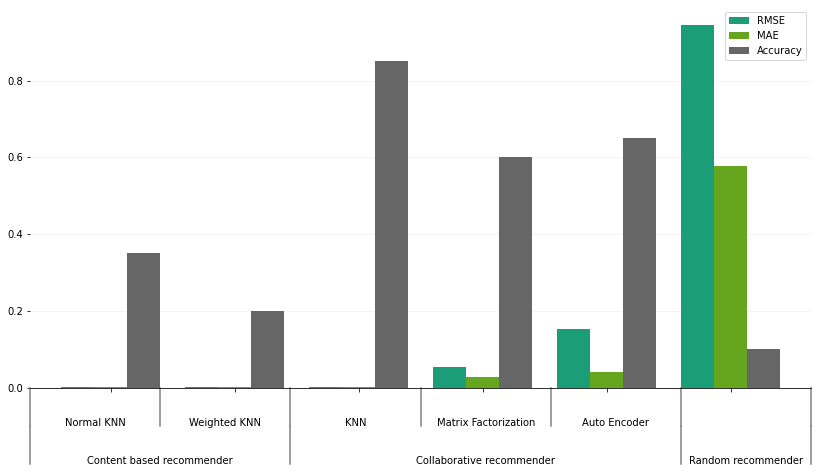

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from itertools import groupby
import numpy as np 
%matplotlib inline

group = ('Content based recommender', 'Collaborative recommender', 'Random recommender')
subgroup = ('KNN', 'KNN', 'MF', 'AE')
obs = ('RMSE', 'MAE', 'Accuracy')
index = pd.MultiIndex.from_tuples([('Content based recommender' ,'Normal KNN'),('Content based recommender' ,'Weighted KNN'), ('Collaborative recommender','KNN'),
                                   ('Collaborative recommender','Matrix Factorization'),('Collaborative recommender','Auto Encoder'),
                                   ('Random recommender', '')],
   names=['group', 'subgroup'])
values = np.array([[0.001,0.001, 0.35], [0.001,0.001, 0.2],[0.001,0.001, 0.85],[0.0552,0.0270, 0.6],[0.1542,0.0397, 0.65], [0.9441,0.5778372, 0.1]])
df = pd.DataFrame(index=index)
df['RMSE'] = values[:,0]
df['MAE'] = values[:,1]
df['Accuracy'] = values[:,2]


def add_line(ax, xpos, ypos):
    line = plt.Line2D([xpos, xpos], [ypos + .1, ypos],
                      transform=ax.transAxes, color='gray')
    line.set_clip_on(False)
    ax.add_line(line)

def label_len(my_index,level):
    labels = my_index.get_level_values(level)
    return [(k, sum(1 for i in g)) for k,g in groupby(labels)]

def label_group_bar_table(ax, df):
    ypos = -.1
    scale = 1./df.index.size
    for level in range(df.index.nlevels)[::-1]:
        pos = 0
        for label, rpos in label_len(df.index,level):
            lxpos = (pos + .5 * rpos)*scale
            ax.text(lxpos, ypos, label, ha='center', transform=ax.transAxes)
            add_line(ax, pos*scale, ypos)
            pos += rpos
        add_line(ax, pos*scale , ypos)
        ypos -= .1


ax = df.plot(kind='bar',stacked=False, figsize=(14,7), colormap='Dark2', width=0.8, zorder=3)
#Below 2 lines remove default labels
ax.set_xticklabels('')
ax.set_xlabel('')
label_group_bar_table(ax, df)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(False)
axes = plt.gca()
axes.yaxis.grid(color=[0.95, 0.95, 0.95])
plt.savefig('results.png')